<a href="https://colab.research.google.com/github/WRD397/Practices/blob/main/ml_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pwd

/content


In [3]:
!ls

drive  sample_data


In [4]:
!cd /content/drive/

In [5]:
!cd ..

In [6]:
!pwd

/content


## **Creating Virtual Environment**

In [32]:
!pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 24.1 MB/s eta 0:00:00


In [33]:
!virtualenv --version

virtualenv 20.21.0 from /usr/local/lib/python3.9/dist-packages/virtualenv/__init__.py


In [34]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distlib==0.3.6
distributed==2022.12.

In [37]:
!python --version

Python 3.9.16


In [38]:
!which python

/usr/local/bin/python


In [42]:
!virtualenv -p /usr/local/bin/python nlp_py39

created virtual environment CPython3.9.16.final.0-64 in 1287ms
  creator CPython3Posix(dest=/content/nlp_py39, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.0.1, setuptools==67.4.0, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [47]:
!source nlp_py39/bin/activate

In [48]:
!which python

/usr/local/bin/python


Its not possible to activate virtualnev in normal way. as activation of virtual environment will happen cell-wise and it wont be able to impact the whole notebook.

> `Importing Dependencies`

In [7]:
import numpy as np
import tensorflow as tf

In [8]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degree Celsius = {} degree Fahrenheite".format(c, fahrenheit_a[i]))

-40.0 degree Celsius = -40.0 degree Fahrenheite
-10.0 degree Celsius = 14.0 degree Fahrenheite
0.0 degree Celsius = 32.0 degree Fahrenheite
8.0 degree Celsius = 46.0 degree Fahrenheite
15.0 degree Celsius = 59.0 degree Fahrenheite
22.0 degree Celsius = 72.0 degree Fahrenheite
38.0 degree Celsius = 100.0 degree Fahrenheite


## Using Simple Regression Model

In [9]:
y = fahrenheit_a
X = celsius_q

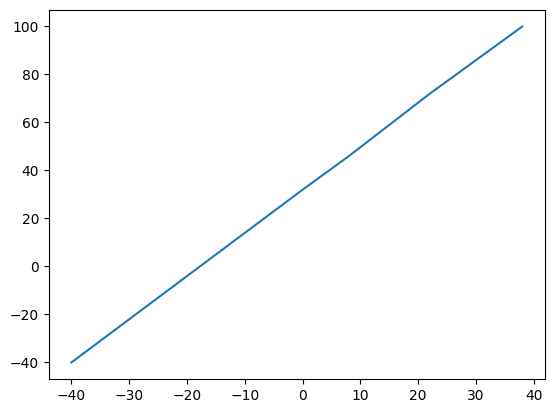

In [11]:
import matplotlib.pyplot as plt
plt.plot(X,y)

As, expected we got the straight line. Now, lets try to find this same pattern using Simple Linear Regression model

In [12]:
X.shape

(7,)

In [13]:
X = X.reshape(-1,1)
X.shape

(7, 1)

In [14]:
X

array([[-40.],
       [-10.],
       [  0.],
       [  8.],
       [ 15.],
       [ 22.],
       [ 38.]])

In [15]:
y.shape

(7,)

In [16]:
y = y.reshape(-1,1)
y.shape

(7, 1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-1.92894084],
       [-0.63476328],
       [-0.20337076],
       [ 0.14174326],
       [ 0.44371802],
       [ 0.74569278],
       [ 1.43592082]])

In [19]:
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [20]:
X_test = np.array([100.0])
X_test.shape

(1,)

In [22]:
X_test = X_test.reshape(-1,1)
X_test

array([[100.]])

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
X_test_scaled

array([[4.11055444]])

In [27]:
y_pred = model.predict(X_test_scaled)

In [28]:
y_pred

array([[211.74743638]])

In [29]:
model.coef_

array([[41.67779978]])

In [30]:
model.intercept_

array([40.42857143])

As we can see that the predicted value is quite accurate with the actual value.

# **Using Neural Network**

`Creating the Layers`

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

`Compiling the Model`

In [4]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))

We dont need to standardize here, as we only have a single feature as independent feature.

In [5]:
callback = tf.keras.callbacks.EarlyStopping(min_delta = 0.1, patience=5)

`Training`

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 1000, verbose='auto', callbacks=[callback])

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 7457.3647

1/1 [==============================] - 0s 334ms/step - loss: 7457.3647
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 7072.9722

1/1 [==============================] - 0s 8ms/step - loss: 7072.9722
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 6700.3047

1/1 [==============================] - 0s 11ms/step - loss: 6700.3047
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 6339.5513

1/1 [==============================] - 0s 8ms/step - loss: 6339.5513
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 5990.8896

1/1 [==============================] - 0s 9ms/step - loss: 5990.8896
Epoch 6/1000
1/1 [==============================] - ETA: 0s - loss: 5654.4688

1/1 [==============================] - 0s 8ms/step - loss: 5654.4688
Epoch 7/1000
1/1 [==============================] - ETA: 0s - loss: 5330.4155

1/1 [==============================] - 0s 9ms/step - loss: 5330.4155
Epoch 8/1000
1/1 [==============================] - ETA: 0s - loss: 5018.8398

1/1 [==============================] - 0s 10ms/step - loss: 5018.8398
Epoch 9/1000
1/1 [==============================] - ETA: 0s - loss: 4719.8179

1/1 [==============================] - 0s 9ms/step - loss: 4719.8179
Epoch 10/1000
1/1 [==============================] - ETA: 0s - loss: 4433.4038

1/1 [==============================] - 0s 8ms/step - loss: 4433.4038
Epoch 11/1000
1/1 [==============================] - ETA: 0s - loss: 4159.6211

1/1 [==============================] - 0s 13ms/step - loss: 4159.6211
Epoch 12/1000
1/1 [==============================] - ETA: 0s - loss: 3898.4663

1/1 [==============================] - 0s 11ms/step - loss: 3898.4663
Epoch 13/1000
1/1 [==============================] - ETA: 0s - loss: 3649.9050

1/1 [==============================] - 0s 11ms/step - loss: 3649.9050
Epoch 14/1000
1/1 [==============================] - ETA: 0s - loss: 3413.8726

1/1 [==============================] - 0s 9ms/step - loss: 3413.8726
Epoch 15/1000
1/1 [==============================] - ETA: 0s - loss: 3190.2729

1/1 [==============================] - 0s 9ms/step - loss: 3190.2729
Epoch 16/1000
1/1 [==============================] - ETA: 0s - loss: 2978.9783

1/1 [==============================] - 0s 10ms/step - loss: 2978.9783
Epoch 17/1000
1/1 [==============================] - ETA: 0s - loss: 2779.8301

1/1 [==============================] - 0s 12ms/step - loss: 2779.8301
Epoch 18/1000
1/1 [==============================] - ETA: 0s - loss: 2592.6379

1/1 [==============================] - 0s 10ms/step - loss: 2592.6379
Epoch 19/1000
1/1 [==============================] - ETA: 0s - loss: 2417.1809

1/1 [==============================] - 0s 10ms/step - loss: 2417.1809
Epoch 20/1000
1/1 [==============================] - ETA: 0s - loss: 2253.2070

1/1 [==============================] - 0s 11ms/step - loss: 2253.2070
Epoch 21/1000
1/1 [==============================] - ETA: 0s - loss: 2100.4360

1/1 [==============================] - 0s 10ms/step - loss: 2100.4360
Epoch 22/1000
1/1 [==============================] - ETA: 0s - loss: 1958.5586

1/1 [==============================] - 0s 10ms/step - loss: 1958.5586
Epoch 23/1000
1/1 [==============================] - ETA: 0s - loss: 1827.2384

1/1 [==============================] - 0s 13ms/step - loss: 1827.2384
Epoch 24/1000
1/1 [==============================] - ETA: 0s - loss: 1706.1152

1/1 [==============================] - 0s 10ms/step - loss: 1706.1152
Epoch 25/1000
1/1 [==============================] - ETA: 0s - loss: 1594.8048

1/1 [==============================] - 0s 11ms/step - loss: 1594.8048
Epoch 26/1000
1/1 [==============================] - ETA: 0s - loss: 1492.9027

1/1 [==============================] - 0s 10ms/step - loss: 1492.9027
Epoch 27/1000
1/1 [==============================] - ETA: 0s - loss: 1399.9856

1/1 [==============================] - 0s 10ms/step - loss: 1399.9856
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 1315.6143

1/1 [==============================] - 0s 9ms/step - loss: 1315.6143
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1239.3370

1/1 [==============================] - 0s 18ms/step - loss: 1239.3370
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1170.6915

1/1 [==============================] - 0s 10ms/step - loss: 1170.6915
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1109.2089

1/1 [==============================] - 0s 10ms/step - loss: 1109.2089
Epoch 32/1000
1/1 [==============================] - ETA: 0s - loss: 1054.4160

1/1 [==============================] - 0s 9ms/step - loss: 1054.4160
Epoch 33/1000
1/1 [==============================] - ETA: 0s - loss: 1005.8392

1/1 [==============================] - 0s 9ms/step - loss: 1005.8392
Epoch 34/1000
1/1 [==============================] - ETA: 0s - loss: 963.0073

1/1 [==============================] - 0s 9ms/step - loss: 963.0073
Epoch 35/1000
1/1 [==============================] - ETA: 0s - loss: 925.4543

1/1 [==============================] - 0s 10ms/step - loss: 925.4543
Epoch 36/1000
1/1 [==============================] - ETA: 0s - loss: 892.7230

1/1 [==============================] - 0s 8ms/step - loss: 892.7230
Epoch 37/1000
1/1 [==============================] - ETA: 0s - loss: 864.3671

1/1 [==============================] - 0s 8ms/step - loss: 864.3671
Epoch 38/1000
1/1 [==============================] - ETA: 0s - loss: 839.9545

1/1 [==============================] - 0s 11ms/step - loss: 839.9545
Epoch 39/1000
1/1 [==============================] - ETA: 0s - loss: 819.0697

1/1 [==============================] - 0s 9ms/step - loss: 819.0697
Epoch 40/1000
1/1 [==============================] - ETA: 0s - loss: 801.3153

1/1 [==============================] - 0s 11ms/step - loss: 801.3153
Epoch 41/1000
1/1 [==============================] - ETA: 0s - loss: 786.3145

1/1 [==============================] - 0s 8ms/step - loss: 786.3145
Epoch 42/1000
1/1 [==============================] - ETA: 0s - loss: 773.7128

1/1 [==============================] - 0s 7ms/step - loss: 773.7128
Epoch 43/1000
1/1 [==============================] - ETA: 0s - loss: 763.1780

1/1 [==============================] - 0s 9ms/step - loss: 763.1780
Epoch 44/1000
1/1 [==============================] - ETA: 0s - loss: 754.4034

1/1 [==============================] - 0s 11ms/step - loss: 754.4034
Epoch 45/1000
1/1 [==============================] - ETA: 0s - loss: 747.1063

1/1 [==============================] - 0s 8ms/step - loss: 747.1063
Epoch 46/1000
1/1 [==============================] - ETA: 0s - loss: 741.0290

1/1 [==============================] - 0s 8ms/step - loss: 741.0290
Epoch 47/1000
1/1 [==============================] - ETA: 0s - loss: 735.9394

1/1 [==============================] - 0s 13ms/step - loss: 735.9394
Epoch 48/1000
1/1 [==============================] - ETA: 0s - loss: 731.6295

1/1 [==============================] - 0s 6ms/step - loss: 731.6295
Epoch 49/1000
1/1 [==============================] - ETA: 0s - loss: 727.9157

1/1 [==============================] - 0s 7ms/step - loss: 727.9157
Epoch 50/1000
1/1 [==============================] - ETA: 0s - loss: 724.6381

1/1 [==============================] - 0s 6ms/step - loss: 724.6381
Epoch 51/1000
1/1 [==============================] - ETA: 0s - loss: 721.6583

1/1 [==============================] - 0s 8ms/step - loss: 721.6583
Epoch 52/1000
1/1 [==============================] - ETA: 0s - loss: 718.8593

1/1 [==============================] - 0s 11ms/step - loss: 718.8593
Epoch 53/1000
1/1 [==============================] - ETA: 0s - loss: 716.1436

1/1 [==============================] - 0s 8ms/step - loss: 716.1436
Epoch 54/1000
1/1 [==============================] - ETA: 0s - loss: 713.4321

1/1 [==============================] - 0s 11ms/step - loss: 713.4321
Epoch 55/1000
1/1 [==============================] - ETA: 0s - loss: 710.6616

1/1 [==============================] - 0s 8ms/step - loss: 710.6616
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 707.7848

1/1 [==============================] - 0s 11ms/step - loss: 707.7848
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 704.7667

1/1 [==============================] - 0s 6ms/step - loss: 704.7667
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 701.5845

1/1 [==============================] - 0s 8ms/step - loss: 701.5845
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 698.2255

1/1 [==============================] - 0s 8ms/step - loss: 698.2255
Epoch 60/1000
1/1 [==============================] - ETA: 0s - loss: 694.6850

1/1 [==============================] - 0s 13ms/step - loss: 694.6850
Epoch 61/1000
1/1 [==============================] - ETA: 0s - loss: 690.9660

1/1 [==============================] - 0s 7ms/step - loss: 690.9660
Epoch 62/1000
1/1 [==============================] - ETA: 0s - loss: 687.0771

1/1 [==============================] - 0s 73ms/step - loss: 687.0771
Epoch 63/1000
1/1 [==============================] - ETA: 0s - loss: 683.0311

1/1 [==============================] - 0s 11ms/step - loss: 683.0311
Epoch 64/1000
1/1 [==============================] - ETA: 0s - loss: 678.8438

1/1 [==============================] - 0s 9ms/step - loss: 678.8438
Epoch 65/1000
1/1 [==============================] - ETA: 0s - loss: 674.5342

1/1 [==============================] - 0s 7ms/step - loss: 674.5342
Epoch 66/1000
1/1 [==============================] - ETA: 0s - loss: 670.1217

1/1 [==============================] - 0s 15ms/step - loss: 670.1217
Epoch 67/1000
1/1 [==============================] - ETA: 0s - loss: 665.6270

1/1 [==============================] - 0s 8ms/step - loss: 665.6270
Epoch 68/1000
1/1 [==============================] - ETA: 0s - loss: 661.0702

1/1 [==============================] - 0s 7ms/step - loss: 661.0702
Epoch 69/1000
1/1 [==============================] - ETA: 0s - loss: 656.4709

1/1 [==============================] - 0s 6ms/step - loss: 656.4709
Epoch 70/1000
1/1 [==============================] - ETA: 0s - loss: 651.8477

1/1 [==============================] - 0s 7ms/step - loss: 651.8477
Epoch 71/1000
1/1 [==============================] - ETA: 0s - loss: 647.2178

1/1 [==============================] - 0s 8ms/step - loss: 647.2178
Epoch 72/1000
1/1 [==============================] - ETA: 0s - loss: 642.5966

1/1 [==============================] - 0s 8ms/step - loss: 642.5966
Epoch 73/1000
1/1 [==============================] - ETA: 0s - loss: 637.9974

1/1 [==============================] - 0s 7ms/step - loss: 637.9974
Epoch 74/1000
1/1 [==============================] - ETA: 0s - loss: 633.4321

1/1 [==============================] - 0s 9ms/step - loss: 633.4321
Epoch 75/1000
1/1 [==============================] - ETA: 0s - loss: 628.9102

1/1 [==============================] - 0s 7ms/step - loss: 628.9102
Epoch 76/1000
1/1 [==============================] - ETA: 0s - loss: 624.4396

1/1 [==============================] - 0s 9ms/step - loss: 624.4396
Epoch 77/1000
1/1 [==============================] - ETA: 0s - loss: 620.0259

1/1 [==============================] - 0s 6ms/step - loss: 620.0259
Epoch 78/1000
1/1 [==============================] - ETA: 0s - loss: 615.6736

1/1 [==============================] - 0s 10ms/step - loss: 615.6736
Epoch 79/1000
1/1 [==============================] - ETA: 0s - loss: 611.3848

1/1 [==============================] - 0s 8ms/step - loss: 611.3848
Epoch 80/1000
1/1 [==============================] - ETA: 0s - loss: 607.1611

1/1 [==============================] - 0s 9ms/step - loss: 607.1611
Epoch 81/1000
1/1 [==============================] - ETA: 0s - loss: 603.0020

1/1 [==============================] - 0s 10ms/step - loss: 603.0020
Epoch 82/1000
1/1 [==============================] - ETA: 0s - loss: 598.9064

1/1 [==============================] - 0s 8ms/step - loss: 598.9064
Epoch 83/1000
1/1 [==============================] - ETA: 0s - loss: 594.8722

1/1 [==============================] - 0s 10ms/step - loss: 594.8722
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 590.8968

1/1 [==============================] - 0s 7ms/step - loss: 590.8968
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 586.9765

1/1 [==============================] - 0s 7ms/step - loss: 586.9765
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 583.1078

1/1 [==============================] - 0s 7ms/step - loss: 583.1078
Epoch 87/1000
1/1 [==============================] - ETA: 0s - loss: 579.2867

1/1 [==============================] - 0s 14ms/step - loss: 579.2867
Epoch 88/1000
1/1 [==============================] - ETA: 0s - loss: 575.5093

1/1 [==============================] - 0s 10ms/step - loss: 575.5093
Epoch 89/1000
1/1 [==============================] - ETA: 0s - loss: 571.7715

1/1 [==============================] - 0s 6ms/step - loss: 571.7715
Epoch 90/1000
1/1 [==============================] - ETA: 0s - loss: 568.0695

1/1 [==============================] - 0s 7ms/step - loss: 568.0695
Epoch 91/1000
1/1 [==============================] - ETA: 0s - loss: 564.3994

1/1 [==============================] - 0s 8ms/step - loss: 564.3994
Epoch 92/1000
1/1 [==============================] - ETA: 0s - loss: 560.7577

1/1 [==============================] - 0s 8ms/step - loss: 560.7577
Epoch 93/1000
1/1 [==============================] - ETA: 0s - loss: 557.1415

1/1 [==============================] - 0s 6ms/step - loss: 557.1415
Epoch 94/1000
1/1 [==============================] - ETA: 0s - loss: 553.5478

1/1 [==============================] - 0s 8ms/step - loss: 553.5478
Epoch 95/1000
1/1 [==============================] - ETA: 0s - loss: 549.9742

1/1 [==============================] - 0s 7ms/step - loss: 549.9742
Epoch 96/1000
1/1 [==============================] - ETA: 0s - loss: 546.4185

1/1 [==============================] - 0s 7ms/step - loss: 546.4185
Epoch 97/1000
1/1 [==============================] - ETA: 0s - loss: 542.8790

1/1 [==============================] - 0s 8ms/step - loss: 542.8790
Epoch 98/1000
1/1 [==============================] - ETA: 0s - loss: 539.3541

1/1 [==============================] - 0s 6ms/step - loss: 539.3541
Epoch 99/1000
1/1 [==============================] - ETA: 0s - loss: 535.8430

1/1 [==============================] - 0s 6ms/step - loss: 535.8430
Epoch 100/1000
1/1 [==============================] - ETA: 0s - loss: 532.3445

1/1 [==============================] - 0s 7ms/step - loss: 532.3445
Epoch 101/1000
1/1 [==============================] - ETA: 0s - loss: 528.8583

1/1 [==============================] - 0s 6ms/step - loss: 528.8583
Epoch 102/1000
1/1 [==============================] - ETA: 0s - loss: 525.3838

1/1 [==============================] - 0s 6ms/step - loss: 525.3838
Epoch 103/1000
1/1 [==============================] - ETA: 0s - loss: 521.9211

1/1 [==============================] - 0s 6ms/step - loss: 521.9211
Epoch 104/1000
1/1 [==============================] - ETA: 0s - loss: 518.4702

1/1 [==============================] - 0s 9ms/step - loss: 518.4702
Epoch 105/1000
1/1 [==============================] - ETA: 0s - loss: 515.0312

1/1 [==============================] - 0s 11ms/step - loss: 515.0312
Epoch 106/1000
1/1 [==============================] - ETA: 0s - loss: 511.6045

1/1 [==============================] - 0s 8ms/step - loss: 511.6045
Epoch 107/1000
1/1 [==============================] - ETA: 0s - loss: 508.1902

1/1 [==============================] - 0s 13ms/step - loss: 508.1902
Epoch 108/1000
1/1 [==============================] - ETA: 0s - loss: 504.7888

1/1 [==============================] - 0s 8ms/step - loss: 504.7888
Epoch 109/1000
1/1 [==============================] - ETA: 0s - loss: 501.4008

1/1 [==============================] - 0s 7ms/step - loss: 501.4008
Epoch 110/1000
1/1 [==============================] - ETA: 0s - loss: 498.0264

1/1 [==============================] - 0s 7ms/step - loss: 498.0264
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 494.6664

1/1 [==============================] - 0s 15ms/step - loss: 494.6664
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 491.3208

1/1 [==============================] - 0s 10ms/step - loss: 491.3208
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 487.9902

1/1 [==============================] - 0s 14ms/step - loss: 487.9902
Epoch 114/1000
1/1 [==============================] - ETA: 0s - loss: 484.6749

1/1 [==============================] - 0s 16ms/step - loss: 484.6749
Epoch 115/1000
1/1 [==============================] - ETA: 0s - loss: 481.3750

1/1 [==============================] - 0s 11ms/step - loss: 481.3750
Epoch 116/1000
1/1 [==============================] - ETA: 0s - loss: 478.0910

1/1 [==============================] - 0s 12ms/step - loss: 478.0910
Epoch 117/1000
1/1 [==============================] - ETA: 0s - loss: 474.8228

1/1 [==============================] - 0s 14ms/step - loss: 474.8228
Epoch 118/1000
1/1 [==============================] - ETA: 0s - loss: 471.5706

1/1 [==============================] - 0s 9ms/step - loss: 471.5706
Epoch 119/1000
1/1 [==============================] - ETA: 0s - loss: 468.3348

1/1 [==============================] - 0s 9ms/step - loss: 468.3348
Epoch 120/1000
1/1 [==============================] - ETA: 0s - loss: 465.1152

1/1 [==============================] - 0s 10ms/step - loss: 465.1152
Epoch 121/1000
1/1 [==============================] - ETA: 0s - loss: 461.9117

1/1 [==============================] - 0s 9ms/step - loss: 461.9117
Epoch 122/1000
1/1 [==============================] - ETA: 0s - loss: 458.7245

1/1 [==============================] - 0s 11ms/step - loss: 458.7245
Epoch 123/1000
1/1 [==============================] - ETA: 0s - loss: 455.5535

1/1 [==============================] - 0s 11ms/step - loss: 455.5535
Epoch 124/1000
1/1 [==============================] - ETA: 0s - loss: 452.3987

1/1 [==============================] - 0s 12ms/step - loss: 452.3987
Epoch 125/1000
1/1 [==============================] - ETA: 0s - loss: 449.2598

1/1 [==============================] - 0s 12ms/step - loss: 449.2598
Epoch 126/1000
1/1 [==============================] - ETA: 0s - loss: 446.1370

1/1 [==============================] - 0s 10ms/step - loss: 446.1370
Epoch 127/1000
1/1 [==============================] - ETA: 0s - loss: 443.0301

1/1 [==============================] - 0s 17ms/step - loss: 443.0301
Epoch 128/1000
1/1 [==============================] - ETA: 0s - loss: 439.9389

1/1 [==============================] - 0s 10ms/step - loss: 439.9389
Epoch 129/1000
1/1 [==============================] - ETA: 0s - loss: 436.8634

1/1 [==============================] - 0s 10ms/step - loss: 436.8634
Epoch 130/1000
1/1 [==============================] - ETA: 0s - loss: 433.8035

1/1 [==============================] - 0s 9ms/step - loss: 433.8035
Epoch 131/1000
1/1 [==============================] - ETA: 0s - loss: 430.7591

1/1 [==============================] - 0s 9ms/step - loss: 430.7591
Epoch 132/1000
1/1 [==============================] - ETA: 0s - loss: 427.7301

1/1 [==============================] - 0s 9ms/step - loss: 427.7301
Epoch 133/1000
1/1 [==============================] - ETA: 0s - loss: 424.7166

1/1 [==============================] - 0s 13ms/step - loss: 424.7166
Epoch 134/1000
1/1 [==============================] - ETA: 0s - loss: 421.7183

1/1 [==============================] - 0s 8ms/step - loss: 421.7183
Epoch 135/1000
1/1 [==============================] - ETA: 0s - loss: 418.7352

1/1 [==============================] - 0s 10ms/step - loss: 418.7352
Epoch 136/1000
1/1 [==============================] - ETA: 0s - loss: 415.7673

1/1 [==============================] - 0s 10ms/step - loss: 415.7673
Epoch 137/1000
1/1 [==============================] - ETA: 0s - loss: 412.8145

1/1 [==============================] - 0s 10ms/step - loss: 412.8145
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 409.8767

1/1 [==============================] - 0s 10ms/step - loss: 409.8767
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 406.9541

1/1 [==============================] - 0s 10ms/step - loss: 406.9541
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 404.0466

1/1 [==============================] - 0s 11ms/step - loss: 404.0466
Epoch 141/1000
1/1 [==============================] - ETA: 0s - loss: 401.1539

1/1 [==============================] - 0s 10ms/step - loss: 401.1539
Epoch 142/1000
1/1 [==============================] - ETA: 0s - loss: 398.2764

1/1 [==============================] - 0s 11ms/step - loss: 398.2764
Epoch 143/1000
1/1 [==============================] - ETA: 0s - loss: 395.4138

1/1 [==============================] - 0s 8ms/step - loss: 395.4138
Epoch 144/1000
1/1 [==============================] - ETA: 0s - loss: 392.5661

1/1 [==============================] - 0s 11ms/step - loss: 392.5661
Epoch 145/1000
1/1 [==============================] - ETA: 0s - loss: 389.7335

1/1 [==============================] - 0s 9ms/step - loss: 389.7335
Epoch 146/1000
1/1 [==============================] - ETA: 0s - loss: 386.9158

1/1 [==============================] - 0s 10ms/step - loss: 386.9158
Epoch 147/1000
1/1 [==============================] - ETA: 0s - loss: 384.1130

1/1 [==============================] - 0s 10ms/step - loss: 384.1130
Epoch 148/1000
1/1 [==============================] - ETA: 0s - loss: 381.3251

1/1 [==============================] - 0s 9ms/step - loss: 381.3251
Epoch 149/1000
1/1 [==============================] - ETA: 0s - loss: 378.5523

1/1 [==============================] - 0s 10ms/step - loss: 378.5523
Epoch 150/1000
1/1 [==============================] - ETA: 0s - loss: 375.7942

1/1 [==============================] - 0s 9ms/step - loss: 375.7942
Epoch 151/1000
1/1 [==============================] - ETA: 0s - loss: 373.0511

1/1 [==============================] - 0s 10ms/step - loss: 373.0511
Epoch 152/1000
1/1 [==============================] - ETA: 0s - loss: 370.3228

1/1 [==============================] - 0s 10ms/step - loss: 370.3228
Epoch 153/1000
1/1 [==============================] - ETA: 0s - loss: 367.6093

1/1 [==============================] - 0s 9ms/step - loss: 367.6093
Epoch 154/1000
1/1 [==============================] - ETA: 0s - loss: 364.9106

1/1 [==============================] - 0s 10ms/step - loss: 364.9106
Epoch 155/1000
1/1 [==============================] - ETA: 0s - loss: 362.2267

1/1 [==============================] - 0s 10ms/step - loss: 362.2267
Epoch 156/1000
1/1 [==============================] - ETA: 0s - loss: 359.5576

1/1 [==============================] - 0s 9ms/step - loss: 359.5576
Epoch 157/1000
1/1 [==============================] - ETA: 0s - loss: 356.9032

1/1 [==============================] - 0s 11ms/step - loss: 356.9032
Epoch 158/1000
1/1 [==============================] - ETA: 0s - loss: 354.2634

1/1 [==============================] - 0s 9ms/step - loss: 354.2634
Epoch 159/1000
1/1 [==============================] - ETA: 0s - loss: 351.6384

1/1 [==============================] - 0s 8ms/step - loss: 351.6384
Epoch 160/1000
1/1 [==============================] - ETA: 0s - loss: 349.0279

1/1 [==============================] - 0s 8ms/step - loss: 349.0279
Epoch 161/1000
1/1 [==============================] - ETA: 0s - loss: 346.4320

1/1 [==============================] - 0s 9ms/step - loss: 346.4320
Epoch 162/1000
1/1 [==============================] - ETA: 0s - loss: 343.8507

1/1 [==============================] - 0s 10ms/step - loss: 343.8507
Epoch 163/1000
1/1 [==============================] - ETA: 0s - loss: 341.2839

1/1 [==============================] - 0s 9ms/step - loss: 341.2839
Epoch 164/1000
1/1 [==============================] - ETA: 0s - loss: 338.7315

1/1 [==============================] - 0s 9ms/step - loss: 338.7315
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 336.1935

1/1 [==============================] - 0s 12ms/step - loss: 336.1935
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 333.6701

1/1 [==============================] - 0s 9ms/step - loss: 333.6701
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 331.1609

1/1 [==============================] - 0s 9ms/step - loss: 331.1609
Epoch 168/1000
1/1 [==============================] - ETA: 0s - loss: 328.6661

1/1 [==============================] - 0s 7ms/step - loss: 328.6661
Epoch 169/1000
1/1 [==============================] - ETA: 0s - loss: 326.1855

1/1 [==============================] - 0s 9ms/step - loss: 326.1855
Epoch 170/1000
1/1 [==============================] - ETA: 0s - loss: 323.7191

1/1 [==============================] - 0s 11ms/step - loss: 323.7191
Epoch 171/1000
1/1 [==============================] - ETA: 0s - loss: 321.2669

1/1 [==============================] - 0s 14ms/step - loss: 321.2669
Epoch 172/1000
1/1 [==============================] - ETA: 0s - loss: 318.8289

1/1 [==============================] - 0s 9ms/step - loss: 318.8289
Epoch 173/1000
1/1 [==============================] - ETA: 0s - loss: 316.4050

1/1 [==============================] - 0s 10ms/step - loss: 316.4050
Epoch 174/1000
1/1 [==============================] - ETA: 0s - loss: 313.9952

1/1 [==============================] - 0s 10ms/step - loss: 313.9952
Epoch 175/1000
1/1 [==============================] - ETA: 0s - loss: 311.5995

1/1 [==============================] - 0s 7ms/step - loss: 311.5995
Epoch 176/1000
1/1 [==============================] - ETA: 0s - loss: 309.2176

1/1 [==============================] - 0s 14ms/step - loss: 309.2176
Epoch 177/1000
1/1 [==============================] - ETA: 0s - loss: 306.8499

1/1 [==============================] - 0s 10ms/step - loss: 306.8499
Epoch 178/1000
1/1 [==============================] - ETA: 0s - loss: 304.4959

1/1 [==============================] - 0s 9ms/step - loss: 304.4959
Epoch 179/1000
1/1 [==============================] - ETA: 0s - loss: 302.1558

1/1 [==============================] - 0s 12ms/step - loss: 302.1558
Epoch 180/1000
1/1 [==============================] - ETA: 0s - loss: 299.8296

1/1 [==============================] - 0s 14ms/step - loss: 299.8296
Epoch 181/1000
1/1 [==============================] - ETA: 0s - loss: 297.5172

1/1 [==============================] - 0s 7ms/step - loss: 297.5172
Epoch 182/1000
1/1 [==============================] - ETA: 0s - loss: 295.2184

1/1 [==============================] - 0s 9ms/step - loss: 295.2184
Epoch 183/1000
1/1 [==============================] - ETA: 0s - loss: 292.9334

1/1 [==============================] - 0s 6ms/step - loss: 292.9334
Epoch 184/1000
1/1 [==============================] - ETA: 0s - loss: 290.6621

1/1 [==============================] - 0s 6ms/step - loss: 290.6621
Epoch 185/1000
1/1 [==============================] - ETA: 0s - loss: 288.4044

1/1 [==============================] - 0s 7ms/step - loss: 288.4044
Epoch 186/1000
1/1 [==============================] - ETA: 0s - loss: 286.1602

1/1 [==============================] - 0s 9ms/step - loss: 286.1602
Epoch 187/1000
1/1 [==============================] - ETA: 0s - loss: 283.9296

1/1 [==============================] - 0s 9ms/step - loss: 283.9296
Epoch 188/1000
1/1 [==============================] - ETA: 0s - loss: 281.7124

1/1 [==============================] - 0s 7ms/step - loss: 281.7124
Epoch 189/1000
1/1 [==============================] - ETA: 0s - loss: 279.5088

1/1 [==============================] - 0s 10ms/step - loss: 279.5088
Epoch 190/1000
1/1 [==============================] - ETA: 0s - loss: 277.3184

1/1 [==============================] - 0s 7ms/step - loss: 277.3184
Epoch 191/1000
1/1 [==============================] - ETA: 0s - loss: 275.1415

1/1 [==============================] - 0s 8ms/step - loss: 275.1415
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 272.9779

1/1 [==============================] - 0s 7ms/step - loss: 272.9779
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 270.8275

1/1 [==============================] - 0s 9ms/step - loss: 270.8275
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 268.6903

1/1 [==============================] - 0s 7ms/step - loss: 268.6903
Epoch 195/1000
1/1 [==============================] - ETA: 0s - loss: 266.5663

1/1 [==============================] - 0s 9ms/step - loss: 266.5663
Epoch 196/1000
1/1 [==============================] - ETA: 0s - loss: 264.4554

1/1 [==============================] - 0s 5ms/step - loss: 264.4554
Epoch 197/1000
1/1 [==============================] - ETA: 0s - loss: 262.3575

1/1 [==============================] - 0s 6ms/step - loss: 262.3575
Epoch 198/1000
1/1 [==============================] - ETA: 0s - loss: 260.2727

1/1 [==============================] - 0s 9ms/step - loss: 260.2727
Epoch 199/1000
1/1 [==============================] - ETA: 0s - loss: 258.2009

1/1 [==============================] - 0s 12ms/step - loss: 258.2009
Epoch 200/1000
1/1 [==============================] - ETA: 0s - loss: 256.1421

1/1 [==============================] - 0s 8ms/step - loss: 256.1421
Epoch 201/1000
1/1 [==============================] - ETA: 0s - loss: 254.0960

1/1 [==============================] - 0s 7ms/step - loss: 254.0960
Epoch 202/1000
1/1 [==============================] - ETA: 0s - loss: 252.0628

1/1 [==============================] - 0s 10ms/step - loss: 252.0628
Epoch 203/1000
1/1 [==============================] - ETA: 0s - loss: 250.0424

1/1 [==============================] - 0s 7ms/step - loss: 250.0424
Epoch 204/1000
1/1 [==============================] - ETA: 0s - loss: 248.0348

1/1 [==============================] - 0s 7ms/step - loss: 248.0348
Epoch 205/1000
1/1 [==============================] - ETA: 0s - loss: 246.0398

1/1 [==============================] - 0s 5ms/step - loss: 246.0398
Epoch 206/1000
1/1 [==============================] - ETA: 0s - loss: 244.0575

1/1 [==============================] - 0s 11ms/step - loss: 244.0575
Epoch 207/1000
1/1 [==============================] - ETA: 0s - loss: 242.0879

1/1 [==============================] - 0s 6ms/step - loss: 242.0879
Epoch 208/1000
1/1 [==============================] - ETA: 0s - loss: 240.1307

1/1 [==============================] - 0s 16ms/step - loss: 240.1307
Epoch 209/1000
1/1 [==============================] - ETA: 0s - loss: 238.1861

1/1 [==============================] - 0s 12ms/step - loss: 238.1861
Epoch 210/1000
1/1 [==============================] - ETA: 0s - loss: 236.2539

1/1 [==============================] - 0s 6ms/step - loss: 236.2539
Epoch 211/1000
1/1 [==============================] - ETA: 0s - loss: 234.3341

1/1 [==============================] - 0s 6ms/step - loss: 234.3341
Epoch 212/1000
1/1 [==============================] - ETA: 0s - loss: 232.4265

1/1 [==============================] - 0s 6ms/step - loss: 232.4265
Epoch 213/1000
1/1 [==============================] - ETA: 0s - loss: 230.5314

1/1 [==============================] - 0s 6ms/step - loss: 230.5314
Epoch 214/1000
1/1 [==============================] - ETA: 0s - loss: 228.6485

1/1 [==============================] - 0s 10ms/step - loss: 228.6485
Epoch 215/1000
1/1 [==============================] - ETA: 0s - loss: 226.7778

1/1 [==============================] - 0s 7ms/step - loss: 226.7778
Epoch 216/1000
1/1 [==============================] - ETA: 0s - loss: 224.9193

1/1 [==============================] - 0s 6ms/step - loss: 224.9193
Epoch 217/1000
1/1 [==============================] - ETA: 0s - loss: 223.0728

1/1 [==============================] - 0s 9ms/step - loss: 223.0728
Epoch 218/1000
1/1 [==============================] - ETA: 0s - loss: 221.2385

1/1 [==============================] - 0s 7ms/step - loss: 221.2385
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 219.4162

1/1 [==============================] - 0s 9ms/step - loss: 219.4162
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 217.6057

1/1 [==============================] - 0s 11ms/step - loss: 217.6057
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 215.8073

1/1 [==============================] - 0s 6ms/step - loss: 215.8073
Epoch 222/1000
1/1 [==============================] - ETA: 0s - loss: 214.0206

1/1 [==============================] - 0s 7ms/step - loss: 214.0206
Epoch 223/1000
1/1 [==============================] - ETA: 0s - loss: 212.2458

1/1 [==============================] - 0s 9ms/step - loss: 212.2458
Epoch 224/1000
1/1 [==============================] - ETA: 0s - loss: 210.4828

1/1 [==============================] - 0s 6ms/step - loss: 210.4828
Epoch 225/1000
1/1 [==============================] - ETA: 0s - loss: 208.7314

1/1 [==============================] - 0s 9ms/step - loss: 208.7314
Epoch 226/1000
1/1 [==============================] - ETA: 0s - loss: 206.9917

1/1 [==============================] - 0s 7ms/step - loss: 206.9917
Epoch 227/1000
1/1 [==============================] - ETA: 0s - loss: 205.2636

1/1 [==============================] - 0s 11ms/step - loss: 205.2636
Epoch 228/1000
1/1 [==============================] - ETA: 0s - loss: 203.5471

1/1 [==============================] - 0s 11ms/step - loss: 203.5471
Epoch 229/1000
1/1 [==============================] - ETA: 0s - loss: 201.8422

1/1 [==============================] - 0s 8ms/step - loss: 201.8422
Epoch 230/1000
1/1 [==============================] - ETA: 0s - loss: 200.1487

1/1 [==============================] - 0s 12ms/step - loss: 200.1487
Epoch 231/1000
1/1 [==============================] - ETA: 0s - loss: 198.4665

1/1 [==============================] - 0s 9ms/step - loss: 198.4665
Epoch 232/1000
1/1 [==============================] - ETA: 0s - loss: 196.7958

1/1 [==============================] - 0s 8ms/step - loss: 196.7958
Epoch 233/1000
1/1 [==============================] - ETA: 0s - loss: 195.1363

1/1 [==============================] - 0s 8ms/step - loss: 195.1363
Epoch 234/1000
1/1 [==============================] - ETA: 0s - loss: 193.4881

1/1 [==============================] - 0s 10ms/step - loss: 193.4881
Epoch 235/1000
1/1 [==============================] - ETA: 0s - loss: 191.8510

1/1 [==============================] - 0s 12ms/step - loss: 191.8510
Epoch 236/1000
1/1 [==============================] - ETA: 0s - loss: 190.2253

1/1 [==============================] - 0s 8ms/step - loss: 190.2253
Epoch 237/1000
1/1 [==============================] - ETA: 0s - loss: 188.6106

1/1 [==============================] - 0s 8ms/step - loss: 188.6106
Epoch 238/1000
1/1 [==============================] - ETA: 0s - loss: 187.0069

1/1 [==============================] - 0s 9ms/step - loss: 187.0069
Epoch 239/1000
1/1 [==============================] - ETA: 0s - loss: 185.4143

1/1 [==============================] - 0s 5ms/step - loss: 185.4143
Epoch 240/1000
1/1 [==============================] - ETA: 0s - loss: 183.8325

1/1 [==============================] - 0s 8ms/step - loss: 183.8325
Epoch 241/1000
1/1 [==============================] - ETA: 0s - loss: 182.2617

1/1 [==============================] - 0s 13ms/step - loss: 182.2617
Epoch 242/1000
1/1 [==============================] - ETA: 0s - loss: 180.7018

1/1 [==============================] - 0s 7ms/step - loss: 180.7018
Epoch 243/1000
1/1 [==============================] - ETA: 0s - loss: 179.1527

1/1 [==============================] - 0s 12ms/step - loss: 179.1527
Epoch 244/1000
1/1 [==============================] - ETA: 0s - loss: 177.6143

1/1 [==============================] - 0s 7ms/step - loss: 177.6143
Epoch 245/1000
1/1 [==============================] - ETA: 0s - loss: 176.0867

1/1 [==============================] - 0s 9ms/step - loss: 176.0867
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 174.5697

1/1 [==============================] - 0s 11ms/step - loss: 174.5697
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 173.0632

1/1 [==============================] - 0s 12ms/step - loss: 173.0632
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 171.5674

1/1 [==============================] - 0s 9ms/step - loss: 171.5674
Epoch 249/1000
1/1 [==============================] - ETA: 0s - loss: 170.0821

1/1 [==============================] - 0s 13ms/step - loss: 170.0821
Epoch 250/1000
1/1 [==============================] - ETA: 0s - loss: 168.6072

1/1 [==============================] - 0s 12ms/step - loss: 168.6072
Epoch 251/1000
1/1 [==============================] - ETA: 0s - loss: 167.1427

1/1 [==============================] - 0s 7ms/step - loss: 167.1427
Epoch 252/1000
1/1 [==============================] - ETA: 0s - loss: 165.6886

1/1 [==============================] - 0s 6ms/step - loss: 165.6886
Epoch 253/1000
1/1 [==============================] - ETA: 0s - loss: 164.2447

1/1 [==============================] - 0s 6ms/step - loss: 164.2447
Epoch 254/1000
1/1 [==============================] - ETA: 0s - loss: 162.8112

1/1 [==============================] - 0s 5ms/step - loss: 162.8112
Epoch 255/1000
1/1 [==============================] - ETA: 0s - loss: 161.3878

1/1 [==============================] - 0s 7ms/step - loss: 161.3878
Epoch 256/1000
1/1 [==============================] - ETA: 0s - loss: 159.9746

1/1 [==============================] - 0s 5ms/step - loss: 159.9746
Epoch 257/1000
1/1 [==============================] - ETA: 0s - loss: 158.5715

1/1 [==============================] - 0s 6ms/step - loss: 158.5715
Epoch 258/1000
1/1 [==============================] - ETA: 0s - loss: 157.1784

1/1 [==============================] - 0s 6ms/step - loss: 157.1784
Epoch 259/1000
1/1 [==============================] - ETA: 0s - loss: 155.7954

1/1 [==============================] - 0s 7ms/step - loss: 155.7954
Epoch 260/1000
1/1 [==============================] - ETA: 0s - loss: 154.4223

1/1 [==============================] - 0s 5ms/step - loss: 154.4223
Epoch 261/1000
1/1 [==============================] - ETA: 0s - loss: 153.0591

1/1 [==============================] - 0s 14ms/step - loss: 153.0591
Epoch 262/1000
1/1 [==============================] - ETA: 0s - loss: 151.7058

1/1 [==============================] - 0s 137ms/step - loss: 151.7058
Epoch 263/1000
1/1 [==============================] - ETA: 0s - loss: 150.3622

1/1 [==============================] - 0s 10ms/step - loss: 150.3622
Epoch 264/1000
1/1 [==============================] - ETA: 0s - loss: 149.0284

1/1 [==============================] - 0s 8ms/step - loss: 149.0284
Epoch 265/1000
1/1 [==============================] - ETA: 0s - loss: 147.7043

1/1 [==============================] - 0s 9ms/step - loss: 147.7043
Epoch 266/1000
1/1 [==============================] - ETA: 0s - loss: 146.3899

1/1 [==============================] - 0s 9ms/step - loss: 146.3899
Epoch 267/1000
1/1 [==============================] - ETA: 0s - loss: 145.0851

1/1 [==============================] - 0s 9ms/step - loss: 145.0851
Epoch 268/1000
1/1 [==============================] - ETA: 0s - loss: 143.7898

1/1 [==============================] - 0s 10ms/step - loss: 143.7898
Epoch 269/1000
1/1 [==============================] - ETA: 0s - loss: 142.5041

1/1 [==============================] - 0s 8ms/step - loss: 142.5041
Epoch 270/1000
1/1 [==============================] - ETA: 0s - loss: 141.2277

1/1 [==============================] - 0s 12ms/step - loss: 141.2277
Epoch 271/1000
1/1 [==============================] - ETA: 0s - loss: 139.9608

1/1 [==============================] - 0s 9ms/step - loss: 139.9608
Epoch 272/1000
1/1 [==============================] - ETA: 0s - loss: 138.7033

1/1 [==============================] - 0s 10ms/step - loss: 138.7033
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 137.4551

1/1 [==============================] - 0s 10ms/step - loss: 137.4551
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 136.2162

1/1 [==============================] - 0s 9ms/step - loss: 136.2162
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 134.9864

1/1 [==============================] - 0s 8ms/step - loss: 134.9864
Epoch 276/1000
1/1 [==============================] - ETA: 0s - loss: 133.7658

1/1 [==============================] - 0s 8ms/step - loss: 133.7658
Epoch 277/1000
1/1 [==============================] - ETA: 0s - loss: 132.5543

1/1 [==============================] - 0s 10ms/step - loss: 132.5543
Epoch 278/1000
1/1 [==============================] - ETA: 0s - loss: 131.3519

1/1 [==============================] - 0s 9ms/step - loss: 131.3519
Epoch 279/1000
1/1 [==============================] - ETA: 0s - loss: 130.1584

1/1 [==============================] - 0s 8ms/step - loss: 130.1584
Epoch 280/1000
1/1 [==============================] - ETA: 0s - loss: 128.9740

1/1 [==============================] - 0s 12ms/step - loss: 128.9740
Epoch 281/1000
1/1 [==============================] - ETA: 0s - loss: 127.7985

1/1 [==============================] - 0s 8ms/step - loss: 127.7985
Epoch 282/1000
1/1 [==============================] - ETA: 0s - loss: 126.6319

1/1 [==============================] - 0s 13ms/step - loss: 126.6319
Epoch 283/1000
1/1 [==============================] - ETA: 0s - loss: 125.4741

1/1 [==============================] - 0s 8ms/step - loss: 125.4741
Epoch 284/1000
1/1 [==============================] - ETA: 0s - loss: 124.3250

1/1 [==============================] - 0s 11ms/step - loss: 124.3250
Epoch 285/1000
1/1 [==============================] - ETA: 0s - loss: 123.1847

1/1 [==============================] - 0s 11ms/step - loss: 123.1847
Epoch 286/1000
1/1 [==============================] - ETA: 0s - loss: 122.0530

1/1 [==============================] - 0s 8ms/step - loss: 122.0530
Epoch 287/1000
1/1 [==============================] - ETA: 0s - loss: 120.9300

1/1 [==============================] - 0s 9ms/step - loss: 120.9300
Epoch 288/1000
1/1 [==============================] - ETA: 0s - loss: 119.8156

1/1 [==============================] - 0s 10ms/step - loss: 119.8156
Epoch 289/1000
1/1 [==============================] - ETA: 0s - loss: 118.7097

1/1 [==============================] - 0s 9ms/step - loss: 118.7097
Epoch 290/1000
1/1 [==============================] - ETA: 0s - loss: 117.6123

1/1 [==============================] - 0s 8ms/step - loss: 117.6123
Epoch 291/1000
1/1 [==============================] - ETA: 0s - loss: 116.5233

1/1 [==============================] - 0s 11ms/step - loss: 116.5233
Epoch 292/1000
1/1 [==============================] - ETA: 0s - loss: 115.4427

1/1 [==============================] - 0s 10ms/step - loss: 115.4427
Epoch 293/1000
1/1 [==============================] - ETA: 0s - loss: 114.3704

1/1 [==============================] - 0s 9ms/step - loss: 114.3704
Epoch 294/1000
1/1 [==============================] - ETA: 0s - loss: 113.3065

1/1 [==============================] - 0s 9ms/step - loss: 113.3065
Epoch 295/1000
1/1 [==============================] - ETA: 0s - loss: 112.2508

1/1 [==============================] - 0s 10ms/step - loss: 112.2508
Epoch 296/1000
1/1 [==============================] - ETA: 0s - loss: 111.2033

1/1 [==============================] - 0s 9ms/step - loss: 111.2033
Epoch 297/1000
1/1 [==============================] - ETA: 0s - loss: 110.1639

1/1 [==============================] - 0s 9ms/step - loss: 110.1639
Epoch 298/1000
1/1 [==============================] - ETA: 0s - loss: 109.1327

1/1 [==============================] - 0s 12ms/step - loss: 109.1327
Epoch 299/1000
1/1 [==============================] - ETA: 0s - loss: 108.1096

1/1 [==============================] - 0s 10ms/step - loss: 108.1096
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 107.0944

1/1 [==============================] - 0s 10ms/step - loss: 107.0944
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 106.0872

1/1 [==============================] - 0s 9ms/step - loss: 106.0872
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 105.0879

1/1 [==============================] - 0s 10ms/step - loss: 105.0879
Epoch 303/1000
1/1 [==============================] - ETA: 0s - loss: 104.0965

1/1 [==============================] - 0s 9ms/step - loss: 104.0965
Epoch 304/1000
1/1 [==============================] - ETA: 0s - loss: 103.1130

1/1 [==============================] - 0s 13ms/step - loss: 103.1130
Epoch 305/1000
1/1 [==============================] - ETA: 0s - loss: 102.1372

1/1 [==============================] - 0s 11ms/step - loss: 102.1372
Epoch 306/1000
1/1 [==============================] - ETA: 0s - loss: 101.1692

1/1 [==============================] - 0s 10ms/step - loss: 101.1692
Epoch 307/1000
1/1 [==============================] - ETA: 0s - loss: 100.2088

1/1 [==============================] - 0s 11ms/step - loss: 100.2088
Epoch 308/1000
1/1 [==============================] - ETA: 0s - loss: 99.2561

1/1 [==============================] - 0s 9ms/step - loss: 99.2561
Epoch 309/1000
1/1 [==============================] - ETA: 0s - loss: 98.3110

1/1 [==============================] - 0s 10ms/step - loss: 98.3110
Epoch 310/1000
1/1 [==============================] - ETA: 0s - loss: 97.3735

1/1 [==============================] - 0s 10ms/step - loss: 97.3735
Epoch 311/1000
1/1 [==============================] - ETA: 0s - loss: 96.4434

1/1 [==============================] - 0s 11ms/step - loss: 96.4434
Epoch 312/1000
1/1 [==============================] - ETA: 0s - loss: 95.5209

1/1 [==============================] - 0s 9ms/step - loss: 95.5209
Epoch 313/1000
1/1 [==============================] - ETA: 0s - loss: 94.6058

1/1 [==============================] - 0s 11ms/step - loss: 94.6058
Epoch 314/1000
1/1 [==============================] - ETA: 0s - loss: 93.6980

1/1 [==============================] - 0s 11ms/step - loss: 93.6980
Epoch 315/1000
1/1 [==============================] - ETA: 0s - loss: 92.7976

1/1 [==============================] - 0s 8ms/step - loss: 92.7976
Epoch 316/1000
1/1 [==============================] - ETA: 0s - loss: 91.9044

1/1 [==============================] - 0s 9ms/step - loss: 91.9044
Epoch 317/1000
1/1 [==============================] - ETA: 0s - loss: 91.0185

1/1 [==============================] - 0s 10ms/step - loss: 91.0185
Epoch 318/1000
1/1 [==============================] - ETA: 0s - loss: 90.1397

1/1 [==============================] - 0s 12ms/step - loss: 90.1397
Epoch 319/1000
1/1 [==============================] - ETA: 0s - loss: 89.2682

1/1 [==============================] - 0s 11ms/step - loss: 89.2682
Epoch 320/1000
1/1 [==============================] - ETA: 0s - loss: 88.4037

1/1 [==============================] - 0s 9ms/step - loss: 88.4037
Epoch 321/1000
1/1 [==============================] - ETA: 0s - loss: 87.5464

1/1 [==============================] - 0s 10ms/step - loss: 87.5464
Epoch 322/1000
1/1 [==============================] - ETA: 0s - loss: 86.6960

1/1 [==============================] - 0s 11ms/step - loss: 86.6960
Epoch 323/1000
1/1 [==============================] - ETA: 0s - loss: 85.8526

1/1 [==============================] - 0s 11ms/step - loss: 85.8526
Epoch 324/1000
1/1 [==============================] - ETA: 0s - loss: 85.0162

1/1 [==============================] - 0s 10ms/step - loss: 85.0162
Epoch 325/1000
1/1 [==============================] - ETA: 0s - loss: 84.1866

1/1 [==============================] - 0s 8ms/step - loss: 84.1866
Epoch 326/1000
1/1 [==============================] - ETA: 0s - loss: 83.3639

1/1 [==============================] - 0s 9ms/step - loss: 83.3639
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 82.5480

1/1 [==============================] - 0s 9ms/step - loss: 82.5480
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 81.7389

1/1 [==============================] - 0s 10ms/step - loss: 81.7389
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 80.9364

1/1 [==============================] - 0s 10ms/step - loss: 80.9364
Epoch 330/1000
1/1 [==============================] - ETA: 0s - loss: 80.1407

1/1 [==============================] - 0s 9ms/step - loss: 80.1407
Epoch 331/1000
1/1 [==============================] - ETA: 0s - loss: 79.3515

1/1 [==============================] - 0s 10ms/step - loss: 79.3515
Epoch 332/1000
1/1 [==============================] - ETA: 0s - loss: 78.5690

1/1 [==============================] - 0s 11ms/step - loss: 78.5690
Epoch 333/1000
1/1 [==============================] - ETA: 0s - loss: 77.7930

1/1 [==============================] - 0s 10ms/step - loss: 77.7930
Epoch 334/1000
1/1 [==============================] - ETA: 0s - loss: 77.0236

1/1 [==============================] - 0s 10ms/step - loss: 77.0236
Epoch 335/1000
1/1 [==============================] - ETA: 0s - loss: 76.2606

1/1 [==============================] - 0s 13ms/step - loss: 76.2606
Epoch 336/1000
1/1 [==============================] - ETA: 0s - loss: 75.5040

1/1 [==============================] - 0s 10ms/step - loss: 75.5040
Epoch 337/1000
1/1 [==============================] - ETA: 0s - loss: 74.7538

1/1 [==============================] - 0s 9ms/step - loss: 74.7538
Epoch 338/1000
1/1 [==============================] - ETA: 0s - loss: 74.0099

1/1 [==============================] - 0s 14ms/step - loss: 74.0099
Epoch 339/1000
1/1 [==============================] - ETA: 0s - loss: 73.2723

1/1 [==============================] - 0s 11ms/step - loss: 73.2723
Epoch 340/1000
1/1 [==============================] - ETA: 0s - loss: 72.5410

1/1 [==============================] - 0s 8ms/step - loss: 72.5410
Epoch 341/1000
1/1 [==============================] - ETA: 0s - loss: 71.8159

1/1 [==============================] - 0s 11ms/step - loss: 71.8159
Epoch 342/1000
1/1 [==============================] - ETA: 0s - loss: 71.0969

1/1 [==============================] - 0s 10ms/step - loss: 71.0969
Epoch 343/1000
1/1 [==============================] - ETA: 0s - loss: 70.3841

1/1 [==============================] - 0s 11ms/step - loss: 70.3841
Epoch 344/1000
1/1 [==============================] - ETA: 0s - loss: 69.6774

1/1 [==============================] - 0s 10ms/step - loss: 69.6774
Epoch 345/1000
1/1 [==============================] - ETA: 0s - loss: 68.9768

1/1 [==============================] - 0s 8ms/step - loss: 68.9768
Epoch 346/1000
1/1 [==============================] - ETA: 0s - loss: 68.2821

1/1 [==============================] - 0s 9ms/step - loss: 68.2821
Epoch 347/1000
1/1 [==============================] - ETA: 0s - loss: 67.5934

1/1 [==============================] - 0s 10ms/step - loss: 67.5934
Epoch 348/1000
1/1 [==============================] - ETA: 0s - loss: 66.9107

1/1 [==============================] - 0s 8ms/step - loss: 66.9107
Epoch 349/1000
1/1 [==============================] - ETA: 0s - loss: 66.2339

1/1 [==============================] - 0s 13ms/step - loss: 66.2339
Epoch 350/1000
1/1 [==============================] - ETA: 0s - loss: 65.5629

1/1 [==============================] - 0s 10ms/step - loss: 65.5629
Epoch 351/1000
1/1 [==============================] - ETA: 0s - loss: 64.8977

1/1 [==============================] - 0s 12ms/step - loss: 64.8977
Epoch 352/1000
1/1 [==============================] - ETA: 0s - loss: 64.2383

1/1 [==============================] - 0s 8ms/step - loss: 64.2383
Epoch 353/1000
1/1 [==============================] - ETA: 0s - loss: 63.5846

1/1 [==============================] - 0s 9ms/step - loss: 63.5846
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 62.9366

1/1 [==============================] - 0s 10ms/step - loss: 62.9366
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 62.2943

1/1 [==============================] - 0s 8ms/step - loss: 62.2943
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 61.6576

1/1 [==============================] - 0s 10ms/step - loss: 61.6576
Epoch 357/1000
1/1 [==============================] - ETA: 0s - loss: 61.0265

1/1 [==============================] - 0s 9ms/step - loss: 61.0265
Epoch 358/1000
1/1 [==============================] - ETA: 0s - loss: 60.4009

1/1 [==============================] - 0s 9ms/step - loss: 60.4009
Epoch 359/1000
1/1 [==============================] - ETA: 0s - loss: 59.7809

1/1 [==============================] - 0s 9ms/step - loss: 59.7809
Epoch 360/1000
1/1 [==============================] - ETA: 0s - loss: 59.1663

1/1 [==============================] - 0s 8ms/step - loss: 59.1663
Epoch 361/1000
1/1 [==============================] - ETA: 0s - loss: 58.5571

1/1 [==============================] - 0s 9ms/step - loss: 58.5571
Epoch 362/1000
1/1 [==============================] - ETA: 0s - loss: 57.9532

1/1 [==============================] - 0s 10ms/step - loss: 57.9532
Epoch 363/1000
1/1 [==============================] - ETA: 0s - loss: 57.3548

1/1 [==============================] - 0s 9ms/step - loss: 57.3548
Epoch 364/1000
1/1 [==============================] - ETA: 0s - loss: 56.7617

1/1 [==============================] - 0s 12ms/step - loss: 56.7617
Epoch 365/1000
1/1 [==============================] - ETA: 0s - loss: 56.1738

1/1 [==============================] - 0s 8ms/step - loss: 56.1738
Epoch 366/1000
1/1 [==============================] - ETA: 0s - loss: 55.5912

1/1 [==============================] - 0s 10ms/step - loss: 55.5912
Epoch 367/1000
1/1 [==============================] - ETA: 0s - loss: 55.0137

1/1 [==============================] - 0s 8ms/step - loss: 55.0137
Epoch 368/1000
1/1 [==============================] - ETA: 0s - loss: 54.4415

1/1 [==============================] - 0s 10ms/step - loss: 54.4415
Epoch 369/1000
1/1 [==============================] - ETA: 0s - loss: 53.8744

1/1 [==============================] - 0s 9ms/step - loss: 53.8744
Epoch 370/1000
1/1 [==============================] - ETA: 0s - loss: 53.3123

1/1 [==============================] - 0s 9ms/step - loss: 53.3123
Epoch 371/1000
1/1 [==============================] - ETA: 0s - loss: 52.7553

1/1 [==============================] - 0s 9ms/step - loss: 52.7553
Epoch 372/1000
1/1 [==============================] - ETA: 0s - loss: 52.2034

1/1 [==============================] - 0s 10ms/step - loss: 52.2034
Epoch 373/1000
1/1 [==============================] - ETA: 0s - loss: 51.6564

1/1 [==============================] - 0s 11ms/step - loss: 51.6564
Epoch 374/1000
1/1 [==============================] - ETA: 0s - loss: 51.1144

1/1 [==============================] - 0s 10ms/step - loss: 51.1144
Epoch 375/1000
1/1 [==============================] - ETA: 0s - loss: 50.5772

1/1 [==============================] - 0s 10ms/step - loss: 50.5772
Epoch 376/1000
1/1 [==============================] - ETA: 0s - loss: 50.0450

1/1 [==============================] - 0s 9ms/step - loss: 50.0450
Epoch 377/1000
1/1 [==============================] - ETA: 0s - loss: 49.5176

1/1 [==============================] - 0s 10ms/step - loss: 49.5176
Epoch 378/1000
1/1 [==============================] - ETA: 0s - loss: 48.9950

1/1 [==============================] - 0s 10ms/step - loss: 48.9950
Epoch 379/1000
1/1 [==============================] - ETA: 0s - loss: 48.4772

1/1 [==============================] - 0s 9ms/step - loss: 48.4772
Epoch 380/1000
1/1 [==============================] - ETA: 0s - loss: 47.9641

1/1 [==============================] - 0s 10ms/step - loss: 47.9641
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 47.4557

1/1 [==============================] - 0s 8ms/step - loss: 47.4557
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 46.9520

1/1 [==============================] - 0s 12ms/step - loss: 46.9520
Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 46.4528

1/1 [==============================] - 0s 9ms/step - loss: 46.4528
Epoch 384/1000
1/1 [==============================] - ETA: 0s - loss: 45.9584

1/1 [==============================] - 0s 9ms/step - loss: 45.9584
Epoch 385/1000
1/1 [==============================] - ETA: 0s - loss: 45.4685

1/1 [==============================] - 0s 11ms/step - loss: 45.4685
Epoch 386/1000
1/1 [==============================] - ETA: 0s - loss: 44.9830

1/1 [==============================] - 0s 10ms/step - loss: 44.9830
Epoch 387/1000
1/1 [==============================] - ETA: 0s - loss: 44.5021

1/1 [==============================] - 0s 17ms/step - loss: 44.5021
Epoch 388/1000
1/1 [==============================] - ETA: 0s - loss: 44.0257

1/1 [==============================] - 0s 12ms/step - loss: 44.0257
Epoch 389/1000
1/1 [==============================] - ETA: 0s - loss: 43.5537

1/1 [==============================] - 0s 11ms/step - loss: 43.5537
Epoch 390/1000
1/1 [==============================] - ETA: 0s - loss: 43.0861

1/1 [==============================] - 0s 8ms/step - loss: 43.0861
Epoch 391/1000
1/1 [==============================] - ETA: 0s - loss: 42.6228

1/1 [==============================] - 0s 8ms/step - loss: 42.6228
Epoch 392/1000
1/1 [==============================] - ETA: 0s - loss: 42.1639

1/1 [==============================] - 0s 7ms/step - loss: 42.1639
Epoch 393/1000
1/1 [==============================] - ETA: 0s - loss: 41.7093

1/1 [==============================] - 0s 12ms/step - loss: 41.7093
Epoch 394/1000
1/1 [==============================] - ETA: 0s - loss: 41.2589

1/1 [==============================] - 0s 11ms/step - loss: 41.2589
Epoch 395/1000
1/1 [==============================] - ETA: 0s - loss: 40.8128

1/1 [==============================] - 0s 9ms/step - loss: 40.8128
Epoch 396/1000
1/1 [==============================] - ETA: 0s - loss: 40.3708

1/1 [==============================] - 0s 9ms/step - loss: 40.3708
Epoch 397/1000
1/1 [==============================] - ETA: 0s - loss: 39.9331

1/1 [==============================] - 0s 13ms/step - loss: 39.9331
Epoch 398/1000
1/1 [==============================] - ETA: 0s - loss: 39.4995

1/1 [==============================] - 0s 9ms/step - loss: 39.4995
Epoch 399/1000
1/1 [==============================] - ETA: 0s - loss: 39.0699

1/1 [==============================] - 0s 9ms/step - loss: 39.0699
Epoch 400/1000
1/1 [==============================] - ETA: 0s - loss: 38.6445

1/1 [==============================] - 0s 12ms/step - loss: 38.6445
Epoch 401/1000
1/1 [==============================] - ETA: 0s - loss: 38.2231

1/1 [==============================] - 0s 8ms/step - loss: 38.2231
Epoch 402/1000
1/1 [==============================] - ETA: 0s - loss: 37.8057

1/1 [==============================] - 0s 11ms/step - loss: 37.8057
Epoch 403/1000
1/1 [==============================] - ETA: 0s - loss: 37.3922

1/1 [==============================] - 0s 9ms/step - loss: 37.3922
Epoch 404/1000
1/1 [==============================] - ETA: 0s - loss: 36.9827

1/1 [==============================] - 0s 9ms/step - loss: 36.9827
Epoch 405/1000
1/1 [==============================] - ETA: 0s - loss: 36.5772

1/1 [==============================] - 0s 8ms/step - loss: 36.5772
Epoch 406/1000
1/1 [==============================] - ETA: 0s - loss: 36.1755

1/1 [==============================] - 0s 6ms/step - loss: 36.1755
Epoch 407/1000
1/1 [==============================] - ETA: 0s - loss: 35.7777

1/1 [==============================] - 0s 9ms/step - loss: 35.7777
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 35.3837

1/1 [==============================] - 0s 9ms/step - loss: 35.3837
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 34.9935

1/1 [==============================] - 0s 9ms/step - loss: 34.9935
Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 34.6071

1/1 [==============================] - 0s 9ms/step - loss: 34.6071
Epoch 411/1000
1/1 [==============================] - ETA: 0s - loss: 34.2244

1/1 [==============================] - 0s 10ms/step - loss: 34.2244
Epoch 412/1000
1/1 [==============================] - ETA: 0s - loss: 33.8454

1/1 [==============================] - 0s 9ms/step - loss: 33.8454
Epoch 413/1000
1/1 [==============================] - ETA: 0s - loss: 33.4701

1/1 [==============================] - 0s 10ms/step - loss: 33.4701
Epoch 414/1000
1/1 [==============================] - ETA: 0s - loss: 33.0984

1/1 [==============================] - 0s 7ms/step - loss: 33.0984
Epoch 415/1000
1/1 [==============================] - ETA: 0s - loss: 32.7304

1/1 [==============================] - 0s 9ms/step - loss: 32.7304
Epoch 416/1000
1/1 [==============================] - ETA: 0s - loss: 32.3659

1/1 [==============================] - 0s 8ms/step - loss: 32.3659
Epoch 417/1000
1/1 [==============================] - ETA: 0s - loss: 32.0050

1/1 [==============================] - 0s 11ms/step - loss: 32.0050
Epoch 418/1000
1/1 [==============================] - ETA: 0s - loss: 31.6477

1/1 [==============================] - 0s 9ms/step - loss: 31.6477
Epoch 419/1000
1/1 [==============================] - ETA: 0s - loss: 31.2938

1/1 [==============================] - 0s 8ms/step - loss: 31.2938
Epoch 420/1000
1/1 [==============================] - ETA: 0s - loss: 30.9434

1/1 [==============================] - 0s 8ms/step - loss: 30.9434
Epoch 421/1000
1/1 [==============================] - ETA: 0s - loss: 30.5965

1/1 [==============================] - 0s 8ms/step - loss: 30.5965
Epoch 422/1000
1/1 [==============================] - ETA: 0s - loss: 30.2530

1/1 [==============================] - 0s 9ms/step - loss: 30.2530
Epoch 423/1000
1/1 [==============================] - ETA: 0s - loss: 29.9129

1/1 [==============================] - 0s 9ms/step - loss: 29.9129
Epoch 424/1000
1/1 [==============================] - ETA: 0s - loss: 29.5761

1/1 [==============================] - 0s 14ms/step - loss: 29.5761
Epoch 425/1000
1/1 [==============================] - ETA: 0s - loss: 29.2427

1/1 [==============================] - 0s 10ms/step - loss: 29.2427
Epoch 426/1000
1/1 [==============================] - ETA: 0s - loss: 28.9125

1/1 [==============================] - 0s 10ms/step - loss: 28.9125
Epoch 427/1000
1/1 [==============================] - ETA: 0s - loss: 28.5857

1/1 [==============================] - 0s 7ms/step - loss: 28.5857
Epoch 428/1000
1/1 [==============================] - ETA: 0s - loss: 28.2621

1/1 [==============================] - 0s 11ms/step - loss: 28.2621
Epoch 429/1000
1/1 [==============================] - ETA: 0s - loss: 27.9418

1/1 [==============================] - 0s 10ms/step - loss: 27.9418
Epoch 430/1000
1/1 [==============================] - ETA: 0s - loss: 27.6246

1/1 [==============================] - 0s 10ms/step - loss: 27.6246
Epoch 431/1000
1/1 [==============================] - ETA: 0s - loss: 27.3106

1/1 [==============================] - 0s 11ms/step - loss: 27.3106
Epoch 432/1000
1/1 [==============================] - ETA: 0s - loss: 26.9998

1/1 [==============================] - 0s 9ms/step - loss: 26.9998
Epoch 433/1000
1/1 [==============================] - ETA: 0s - loss: 26.6921

1/1 [==============================] - 0s 10ms/step - loss: 26.6921
Epoch 434/1000
1/1 [==============================] - ETA: 0s - loss: 26.3875

1/1 [==============================] - 0s 9ms/step - loss: 26.3875
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 26.0859

1/1 [==============================] - 0s 9ms/step - loss: 26.0859
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 25.7874

1/1 [==============================] - 0s 11ms/step - loss: 25.7874
Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 25.4919

1/1 [==============================] - 0s 12ms/step - loss: 25.4919
Epoch 438/1000
1/1 [==============================] - ETA: 0s - loss: 25.1994

1/1 [==============================] - 0s 11ms/step - loss: 25.1994
Epoch 439/1000
1/1 [==============================] - ETA: 0s - loss: 24.9099

1/1 [==============================] - 0s 8ms/step - loss: 24.9099
Epoch 440/1000
1/1 [==============================] - ETA: 0s - loss: 24.6233

1/1 [==============================] - 0s 16ms/step - loss: 24.6233
Epoch 441/1000
1/1 [==============================] - ETA: 0s - loss: 24.3397

1/1 [==============================] - 0s 9ms/step - loss: 24.3397
Epoch 442/1000
1/1 [==============================] - ETA: 0s - loss: 24.0589

1/1 [==============================] - 0s 10ms/step - loss: 24.0589
Epoch 443/1000
1/1 [==============================] - ETA: 0s - loss: 23.7810

1/1 [==============================] - 0s 9ms/step - loss: 23.7810
Epoch 444/1000
1/1 [==============================] - ETA: 0s - loss: 23.5059

1/1 [==============================] - 0s 9ms/step - loss: 23.5059
Epoch 445/1000
1/1 [==============================] - ETA: 0s - loss: 23.2337

1/1 [==============================] - 0s 9ms/step - loss: 23.2337
Epoch 446/1000
1/1 [==============================] - ETA: 0s - loss: 22.9642

1/1 [==============================] - 0s 11ms/step - loss: 22.9642
Epoch 447/1000
1/1 [==============================] - ETA: 0s - loss: 22.6976

1/1 [==============================] - 0s 7ms/step - loss: 22.6976
Epoch 448/1000
1/1 [==============================] - ETA: 0s - loss: 22.4336

1/1 [==============================] - 0s 5ms/step - loss: 22.4336
Epoch 449/1000
1/1 [==============================] - ETA: 0s - loss: 22.1724

1/1 [==============================] - 0s 7ms/step - loss: 22.1724
Epoch 450/1000
1/1 [==============================] - ETA: 0s - loss: 21.9139

1/1 [==============================] - 0s 9ms/step - loss: 21.9139
Epoch 451/1000
1/1 [==============================] - ETA: 0s - loss: 21.6580

1/1 [==============================] - 0s 17ms/step - loss: 21.6580
Epoch 452/1000
1/1 [==============================] - ETA: 0s - loss: 21.4049

1/1 [==============================] - 0s 7ms/step - loss: 21.4049
Epoch 453/1000
1/1 [==============================] - ETA: 0s - loss: 21.1543

1/1 [==============================] - 0s 6ms/step - loss: 21.1543
Epoch 454/1000
1/1 [==============================] - ETA: 0s - loss: 20.9064

1/1 [==============================] - 0s 7ms/step - loss: 20.9064
Epoch 455/1000
1/1 [==============================] - ETA: 0s - loss: 20.6610

1/1 [==============================] - 0s 11ms/step - loss: 20.6610
Epoch 456/1000
1/1 [==============================] - ETA: 0s - loss: 20.4182

1/1 [==============================] - 0s 8ms/step - loss: 20.4182
Epoch 457/1000
1/1 [==============================] - ETA: 0s - loss: 20.1779

1/1 [==============================] - 0s 14ms/step - loss: 20.1779
Epoch 458/1000
1/1 [==============================] - ETA: 0s - loss: 19.9402

1/1 [==============================] - 0s 6ms/step - loss: 19.9402
Epoch 459/1000
1/1 [==============================] - ETA: 0s - loss: 19.7049

1/1 [==============================] - 0s 7ms/step - loss: 19.7049
Epoch 460/1000
1/1 [==============================] - ETA: 0s - loss: 19.4721

1/1 [==============================] - 0s 7ms/step - loss: 19.4721
Epoch 461/1000
1/1 [==============================] - ETA: 0s - loss: 19.2418

1/1 [==============================] - 0s 8ms/step - loss: 19.2418
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 19.0139

1/1 [==============================] - 0s 7ms/step - loss: 19.0139
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 18.7884

1/1 [==============================] - 0s 10ms/step - loss: 18.7884
Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 18.5653

1/1 [==============================] - 0s 7ms/step - loss: 18.5653
Epoch 465/1000
1/1 [==============================] - ETA: 0s - loss: 18.3445

1/1 [==============================] - 0s 7ms/step - loss: 18.3445
Epoch 466/1000
1/1 [==============================] - ETA: 0s - loss: 18.1261

1/1 [==============================] - 0s 8ms/step - loss: 18.1261
Epoch 467/1000
1/1 [==============================] - ETA: 0s - loss: 17.9100

1/1 [==============================] - 0s 14ms/step - loss: 17.9100
Epoch 468/1000
1/1 [==============================] - ETA: 0s - loss: 17.6962

1/1 [==============================] - 0s 8ms/step - loss: 17.6962
Epoch 469/1000
1/1 [==============================] - ETA: 0s - loss: 17.4847

1/1 [==============================] - 0s 10ms/step - loss: 17.4847
Epoch 470/1000
1/1 [==============================] - ETA: 0s - loss: 17.2755

1/1 [==============================] - 0s 10ms/step - loss: 17.2755
Epoch 471/1000
1/1 [==============================] - ETA: 0s - loss: 17.0685

1/1 [==============================] - 0s 7ms/step - loss: 17.0685
Epoch 472/1000
1/1 [==============================] - ETA: 0s - loss: 16.8637

1/1 [==============================] - 0s 6ms/step - loss: 16.8637
Epoch 473/1000
1/1 [==============================] - ETA: 0s - loss: 16.6611

1/1 [==============================] - 0s 7ms/step - loss: 16.6611
Epoch 474/1000
1/1 [==============================] - ETA: 0s - loss: 16.4607

1/1 [==============================] - 0s 6ms/step - loss: 16.4607
Epoch 475/1000
1/1 [==============================] - ETA: 0s - loss: 16.2624

1/1 [==============================] - 0s 10ms/step - loss: 16.2624
Epoch 476/1000
1/1 [==============================] - ETA: 0s - loss: 16.0663

1/1 [==============================] - 0s 7ms/step - loss: 16.0663
Epoch 477/1000
1/1 [==============================] - ETA: 0s - loss: 15.8723

1/1 [==============================] - 0s 7ms/step - loss: 15.8723
Epoch 478/1000
1/1 [==============================] - ETA: 0s - loss: 15.6803

1/1 [==============================] - 0s 10ms/step - loss: 15.6803
Epoch 479/1000
1/1 [==============================] - ETA: 0s - loss: 15.4905

1/1 [==============================] - 0s 6ms/step - loss: 15.4905
Epoch 480/1000
1/1 [==============================] - ETA: 0s - loss: 15.3027

1/1 [==============================] - 0s 6ms/step - loss: 15.3027
Epoch 481/1000
1/1 [==============================] - ETA: 0s - loss: 15.1170

1/1 [==============================] - 0s 6ms/step - loss: 15.1170
Epoch 482/1000
1/1 [==============================] - ETA: 0s - loss: 14.9333

1/1 [==============================] - 0s 7ms/step - loss: 14.9333
Epoch 483/1000
1/1 [==============================] - ETA: 0s - loss: 14.7516

1/1 [==============================] - 0s 9ms/step - loss: 14.7516
Epoch 484/1000
1/1 [==============================] - ETA: 0s - loss: 14.5719

1/1 [==============================] - 0s 7ms/step - loss: 14.5719
Epoch 485/1000
1/1 [==============================] - ETA: 0s - loss: 14.3941

1/1 [==============================] - 0s 6ms/step - loss: 14.3941
Epoch 486/1000
1/1 [==============================] - ETA: 0s - loss: 14.2183

1/1 [==============================] - 0s 6ms/step - loss: 14.2183
Epoch 487/1000
1/1 [==============================] - ETA: 0s - loss: 14.0445

1/1 [==============================] - 0s 7ms/step - loss: 14.0445
Epoch 488/1000
1/1 [==============================] - ETA: 0s - loss: 13.8725

1/1 [==============================] - 0s 9ms/step - loss: 13.8725
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 13.7024

1/1 [==============================] - 0s 6ms/step - loss: 13.7024
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 13.5342

1/1 [==============================] - 0s 7ms/step - loss: 13.5342
Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 13.3679

1/1 [==============================] - 0s 14ms/step - loss: 13.3679
Epoch 492/1000
1/1 [==============================] - ETA: 0s - loss: 13.2034

1/1 [==============================] - 0s 6ms/step - loss: 13.2034
Epoch 493/1000
1/1 [==============================] - ETA: 0s - loss: 13.0407

1/1 [==============================] - 0s 6ms/step - loss: 13.0407
Epoch 494/1000
1/1 [==============================] - ETA: 0s - loss: 12.8798

1/1 [==============================] - 0s 6ms/step - loss: 12.8798
Epoch 495/1000
1/1 [==============================] - ETA: 0s - loss: 12.7207

1/1 [==============================] - 0s 5ms/step - loss: 12.7207
Epoch 496/1000
1/1 [==============================] - ETA: 0s - loss: 12.5634

1/1 [==============================] - 0s 6ms/step - loss: 12.5634
Epoch 497/1000
1/1 [==============================] - ETA: 0s - loss: 12.4079

1/1 [==============================] - 0s 6ms/step - loss: 12.4079
Epoch 498/1000
1/1 [==============================] - ETA: 0s - loss: 12.2541

1/1 [==============================] - 0s 6ms/step - loss: 12.2541
Epoch 499/1000
1/1 [==============================] - ETA: 0s - loss: 12.1020

1/1 [==============================] - 0s 7ms/step - loss: 12.1020
Epoch 500/1000
1/1 [==============================] - ETA: 0s - loss: 11.9515

1/1 [==============================] - 0s 7ms/step - loss: 11.9515
Epoch 501/1000
1/1 [==============================] - ETA: 0s - loss: 11.8028

1/1 [==============================] - 0s 13ms/step - loss: 11.8028
Epoch 502/1000
1/1 [==============================] - ETA: 0s - loss: 11.6558

1/1 [==============================] - 0s 6ms/step - loss: 11.6558
Epoch 503/1000
1/1 [==============================] - ETA: 0s - loss: 11.5104

1/1 [==============================] - 0s 7ms/step - loss: 11.5104
Epoch 504/1000
1/1 [==============================] - ETA: 0s - loss: 11.3667

1/1 [==============================] - 0s 7ms/step - loss: 11.3667
Epoch 505/1000
1/1 [==============================] - ETA: 0s - loss: 11.2245

1/1 [==============================] - 0s 18ms/step - loss: 11.2245
Epoch 506/1000
1/1 [==============================] - ETA: 0s - loss: 11.0840

1/1 [==============================] - 0s 6ms/step - loss: 11.0840
Epoch 507/1000
1/1 [==============================] - ETA: 0s - loss: 10.9451

1/1 [==============================] - 0s 9ms/step - loss: 10.9451
Epoch 508/1000
1/1 [==============================] - ETA: 0s - loss: 10.8077

1/1 [==============================] - 0s 10ms/step - loss: 10.8077
Epoch 509/1000
1/1 [==============================] - ETA: 0s - loss: 10.6719

1/1 [==============================] - 0s 10ms/step - loss: 10.6719
Epoch 510/1000
1/1 [==============================] - ETA: 0s - loss: 10.5377

1/1 [==============================] - 0s 12ms/step - loss: 10.5377
Epoch 511/1000
1/1 [==============================] - ETA: 0s - loss: 10.4050

1/1 [==============================] - 0s 9ms/step - loss: 10.4050
Epoch 512/1000
1/1 [==============================] - ETA: 0s - loss: 10.2738

1/1 [==============================] - 0s 10ms/step - loss: 10.2738
Epoch 513/1000
1/1 [==============================] - ETA: 0s - loss: 10.1441

1/1 [==============================] - 0s 11ms/step - loss: 10.1441
Epoch 514/1000
1/1 [==============================] - ETA: 0s - loss: 10.0158

1/1 [==============================] - 0s 8ms/step - loss: 10.0158
Epoch 515/1000
1/1 [==============================] - ETA: 0s - loss: 9.8891

1/1 [==============================] - 0s 8ms/step - loss: 9.8891
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 9.7638

1/1 [==============================] - 0s 6ms/step - loss: 9.7638
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 9.6399

1/1 [==============================] - 0s 8ms/step - loss: 9.6399
Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 9.5175

1/1 [==============================] - 0s 9ms/step - loss: 9.5175
Epoch 519/1000
1/1 [==============================] - ETA: 0s - loss: 9.3965

1/1 [==============================] - 0s 6ms/step - loss: 9.3965
Epoch 520/1000
1/1 [==============================] - ETA: 0s - loss: 9.2769

1/1 [==============================] - 0s 9ms/step - loss: 9.2769
Epoch 521/1000
1/1 [==============================] - ETA: 0s - loss: 9.1586

1/1 [==============================] - 0s 19ms/step - loss: 9.1586
Epoch 522/1000
1/1 [==============================] - ETA: 0s - loss: 9.0418

1/1 [==============================] - 0s 8ms/step - loss: 9.0418
Epoch 523/1000
1/1 [==============================] - ETA: 0s - loss: 8.9262

1/1 [==============================] - 0s 13ms/step - loss: 8.9262
Epoch 524/1000
1/1 [==============================] - ETA: 0s - loss: 8.8121

1/1 [==============================] - 0s 10ms/step - loss: 8.8121
Epoch 525/1000
1/1 [==============================] - ETA: 0s - loss: 8.6992

1/1 [==============================] - 0s 6ms/step - loss: 8.6992
Epoch 526/1000
1/1 [==============================] - ETA: 0s - loss: 8.5877

1/1 [==============================] - 0s 11ms/step - loss: 8.5877
Epoch 527/1000
1/1 [==============================] - ETA: 0s - loss: 8.4775

1/1 [==============================] - 0s 5ms/step - loss: 8.4775
Epoch 528/1000
1/1 [==============================] - ETA: 0s - loss: 8.3685

1/1 [==============================] - 0s 5ms/step - loss: 8.3685
Epoch 529/1000
1/1 [==============================] - ETA: 0s - loss: 8.2609

1/1 [==============================] - 0s 6ms/step - loss: 8.2609
Epoch 530/1000
1/1 [==============================] - ETA: 0s - loss: 8.1545

1/1 [==============================] - 0s 7ms/step - loss: 8.1545
Epoch 531/1000
1/1 [==============================] - ETA: 0s - loss: 8.0493

1/1 [==============================] - 0s 7ms/step - loss: 8.0493
Epoch 532/1000
1/1 [==============================] - ETA: 0s - loss: 7.9454

1/1 [==============================] - 0s 7ms/step - loss: 7.9454
Epoch 533/1000
1/1 [==============================] - ETA: 0s - loss: 7.8427

1/1 [==============================] - 0s 6ms/step - loss: 7.8427
Epoch 534/1000
1/1 [==============================] - ETA: 0s - loss: 7.7413

1/1 [==============================] - 0s 13ms/step - loss: 7.7413
Epoch 535/1000
1/1 [==============================] - ETA: 0s - loss: 7.6410

1/1 [==============================] - 0s 8ms/step - loss: 7.6410
Epoch 536/1000
1/1 [==============================] - ETA: 0s - loss: 7.5419

1/1 [==============================] - 0s 6ms/step - loss: 7.5419
Epoch 537/1000
1/1 [==============================] - ETA: 0s - loss: 7.4440

1/1 [==============================] - 0s 9ms/step - loss: 7.4440
Epoch 538/1000
1/1 [==============================] - ETA: 0s - loss: 7.3472

1/1 [==============================] - 0s 8ms/step - loss: 7.3472
Epoch 539/1000
1/1 [==============================] - ETA: 0s - loss: 7.2516

1/1 [==============================] - 0s 13ms/step - loss: 7.2516
Epoch 540/1000
1/1 [==============================] - ETA: 0s - loss: 7.1571

1/1 [==============================] - 0s 12ms/step - loss: 7.1571
Epoch 541/1000
1/1 [==============================] - ETA: 0s - loss: 7.0638

1/1 [==============================] - 0s 10ms/step - loss: 7.0638
Epoch 542/1000
1/1 [==============================] - ETA: 0s - loss: 6.9716

1/1 [==============================] - 0s 12ms/step - loss: 6.9716
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 6.8804

1/1 [==============================] - 0s 9ms/step - loss: 6.8804
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 6.7904

1/1 [==============================] - 0s 6ms/step - loss: 6.7904
Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 6.7014

1/1 [==============================] - 0s 6ms/step - loss: 6.7014
Epoch 546/1000
1/1 [==============================] - ETA: 0s - loss: 6.6136

1/1 [==============================] - 0s 6ms/step - loss: 6.6136
Epoch 547/1000
1/1 [==============================] - ETA: 0s - loss: 6.5267

1/1 [==============================] - 0s 7ms/step - loss: 6.5267
Epoch 548/1000
1/1 [==============================] - ETA: 0s - loss: 6.4409

1/1 [==============================] - 0s 7ms/step - loss: 6.4409
Epoch 549/1000
1/1 [==============================] - ETA: 0s - loss: 6.3562

1/1 [==============================] - 0s 17ms/step - loss: 6.3562
Epoch 550/1000
1/1 [==============================] - ETA: 0s - loss: 6.2725

1/1 [==============================] - 0s 6ms/step - loss: 6.2725
Epoch 551/1000
1/1 [==============================] - ETA: 0s - loss: 6.1897

1/1 [==============================] - 0s 7ms/step - loss: 6.1897
Epoch 552/1000
1/1 [==============================] - ETA: 0s - loss: 6.1080

1/1 [==============================] - 0s 6ms/step - loss: 6.1080
Epoch 553/1000
1/1 [==============================] - ETA: 0s - loss: 6.0273

1/1 [==============================] - 0s 8ms/step - loss: 6.0273
Epoch 554/1000
1/1 [==============================] - ETA: 0s - loss: 5.9476

1/1 [==============================] - 0s 8ms/step - loss: 5.9476
Epoch 555/1000
1/1 [==============================] - ETA: 0s - loss: 5.8688

1/1 [==============================] - 0s 6ms/step - loss: 5.8688
Epoch 556/1000
1/1 [==============================] - ETA: 0s - loss: 5.7910

1/1 [==============================] - 0s 10ms/step - loss: 5.7910
Epoch 557/1000
1/1 [==============================] - ETA: 0s - loss: 5.7141

1/1 [==============================] - 0s 7ms/step - loss: 5.7141
Epoch 558/1000
1/1 [==============================] - ETA: 0s - loss: 5.6382

1/1 [==============================] - 0s 7ms/step - loss: 5.6382
Epoch 559/1000
1/1 [==============================] - ETA: 0s - loss: 5.5632

1/1 [==============================] - 0s 12ms/step - loss: 5.5632
Epoch 560/1000
1/1 [==============================] - ETA: 0s - loss: 5.4891

1/1 [==============================] - 0s 7ms/step - loss: 5.4891
Epoch 561/1000
1/1 [==============================] - ETA: 0s - loss: 5.4159

1/1 [==============================] - 0s 8ms/step - loss: 5.4159
Epoch 562/1000
1/1 [==============================] - ETA: 0s - loss: 5.3437

1/1 [==============================] - 0s 7ms/step - loss: 5.3437
Epoch 563/1000
1/1 [==============================] - ETA: 0s - loss: 5.2723

1/1 [==============================] - 0s 8ms/step - loss: 5.2723
Epoch 564/1000
1/1 [==============================] - ETA: 0s - loss: 5.2018

1/1 [==============================] - 0s 14ms/step - loss: 5.2018
Epoch 565/1000
1/1 [==============================] - ETA: 0s - loss: 5.1321

1/1 [==============================] - 0s 6ms/step - loss: 5.1321
Epoch 566/1000
1/1 [==============================] - ETA: 0s - loss: 5.0634

1/1 [==============================] - 0s 5ms/step - loss: 5.0634
Epoch 567/1000
1/1 [==============================] - ETA: 0s - loss: 4.9955

1/1 [==============================] - 0s 6ms/step - loss: 4.9955
Epoch 568/1000
1/1 [==============================] - ETA: 0s - loss: 4.9284

1/1 [==============================] - 0s 6ms/step - loss: 4.9284
Epoch 569/1000
1/1 [==============================] - ETA: 0s - loss: 4.8621

1/1 [==============================] - 0s 7ms/step - loss: 4.8621
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 4.7967

1/1 [==============================] - 0s 10ms/step - loss: 4.7967
Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 4.7321

1/1 [==============================] - 0s 15ms/step - loss: 4.7321
Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 4.6683

1/1 [==============================] - 0s 6ms/step - loss: 4.6683
Epoch 573/1000
1/1 [==============================] - ETA: 0s - loss: 4.6053

1/1 [==============================] - 0s 6ms/step - loss: 4.6053
Epoch 574/1000
1/1 [==============================] - ETA: 0s - loss: 4.5431

1/1 [==============================] - 0s 7ms/step - loss: 4.5431
Epoch 575/1000
1/1 [==============================] - ETA: 0s - loss: 4.4816

1/1 [==============================] - 0s 7ms/step - loss: 4.4816
Epoch 576/1000
1/1 [==============================] - ETA: 0s - loss: 4.4210

1/1 [==============================] - 0s 15ms/step - loss: 4.4210
Epoch 577/1000
1/1 [==============================] - ETA: 0s - loss: 4.3610

1/1 [==============================] - 0s 6ms/step - loss: 4.3610
Epoch 578/1000
1/1 [==============================] - ETA: 0s - loss: 4.3019

1/1 [==============================] - 0s 9ms/step - loss: 4.3019
Epoch 579/1000
1/1 [==============================] - ETA: 0s - loss: 4.2435

1/1 [==============================] - 0s 6ms/step - loss: 4.2435
Epoch 580/1000
1/1 [==============================] - ETA: 0s - loss: 4.1858

1/1 [==============================] - 0s 5ms/step - loss: 4.1858
Epoch 581/1000
1/1 [==============================] - ETA: 0s - loss: 4.1288

1/1 [==============================] - 0s 6ms/step - loss: 4.1288
Epoch 582/1000
1/1 [==============================] - ETA: 0s - loss: 4.0726

1/1 [==============================] - 0s 5ms/step - loss: 4.0726
Epoch 583/1000
1/1 [==============================] - ETA: 0s - loss: 4.0171

1/1 [==============================] - 0s 7ms/step - loss: 4.0171
Epoch 584/1000
1/1 [==============================] - ETA: 0s - loss: 3.9623

1/1 [==============================] - 0s 6ms/step - loss: 3.9623
Epoch 585/1000
1/1 [==============================] - ETA: 0s - loss: 3.9082

1/1 [==============================] - 0s 17ms/step - loss: 3.9082
Epoch 586/1000
1/1 [==============================] - ETA: 0s - loss: 3.8547

1/1 [==============================] - 0s 6ms/step - loss: 3.8547
Epoch 587/1000
1/1 [==============================] - ETA: 0s - loss: 3.8020

1/1 [==============================] - 0s 6ms/step - loss: 3.8020
Epoch 588/1000
1/1 [==============================] - ETA: 0s - loss: 3.7499

1/1 [==============================] - 0s 5ms/step - loss: 3.7499
Epoch 589/1000
1/1 [==============================] - ETA: 0s - loss: 3.6985

1/1 [==============================] - 0s 5ms/step - loss: 3.6985
Epoch 590/1000
1/1 [==============================] - ETA: 0s - loss: 3.6477

1/1 [==============================] - 0s 5ms/step - loss: 3.6477
Epoch 591/1000
1/1 [==============================] - ETA: 0s - loss: 3.5976

1/1 [==============================] - 0s 6ms/step - loss: 3.5976
Epoch 592/1000
1/1 [==============================] - ETA: 0s - loss: 3.5481

1/1 [==============================] - 0s 6ms/step - loss: 3.5481
Epoch 593/1000
1/1 [==============================] - ETA: 0s - loss: 3.4993

1/1 [==============================] - 0s 6ms/step - loss: 3.4993
Epoch 594/1000
1/1 [==============================] - ETA: 0s - loss: 3.4511

1/1 [==============================] - 0s 6ms/step - loss: 3.4511
Epoch 595/1000
1/1 [==============================] - ETA: 0s - loss: 3.4035

1/1 [==============================] - 0s 6ms/step - loss: 3.4035
Epoch 596/1000
1/1 [==============================] - ETA: 0s - loss: 3.3566

1/1 [==============================] - 0s 6ms/step - loss: 3.3566
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 3.3102

1/1 [==============================] - 0s 6ms/step - loss: 3.3102
Epoch 598/1000
1/1 [==============================] - ETA: 0s - loss: 3.2644

1/1 [==============================] - 0s 13ms/step - loss: 3.2644
Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 3.2193

1/1 [==============================] - 0s 6ms/step - loss: 3.2193
Epoch 600/1000
1/1 [==============================] - ETA: 0s - loss: 3.1747

1/1 [==============================] - 0s 6ms/step - loss: 3.1747
Epoch 601/1000
1/1 [==============================] - ETA: 0s - loss: 3.1307

1/1 [==============================] - 0s 8ms/step - loss: 3.1307
Epoch 602/1000
1/1 [==============================] - ETA: 0s - loss: 3.0872

1/1 [==============================] - 0s 6ms/step - loss: 3.0872
Epoch 603/1000
1/1 [==============================] - ETA: 0s - loss: 3.0443

1/1 [==============================] - 0s 6ms/step - loss: 3.0443
Epoch 604/1000
1/1 [==============================] - ETA: 0s - loss: 3.0020

1/1 [==============================] - 0s 5ms/step - loss: 3.0020
Epoch 605/1000
1/1 [==============================] - ETA: 0s - loss: 2.9603

1/1 [==============================] - 0s 6ms/step - loss: 2.9603
Epoch 606/1000
1/1 [==============================] - ETA: 0s - loss: 2.9191

1/1 [==============================] - 0s 7ms/step - loss: 2.9191
Epoch 607/1000
1/1 [==============================] - ETA: 0s - loss: 2.8784

1/1 [==============================] - 0s 13ms/step - loss: 2.8784
Epoch 608/1000
1/1 [==============================] - ETA: 0s - loss: 2.8382

1/1 [==============================] - 0s 6ms/step - loss: 2.8382
Epoch 609/1000
1/1 [==============================] - ETA: 0s - loss: 2.7986

1/1 [==============================] - 0s 6ms/step - loss: 2.7986
Epoch 610/1000
1/1 [==============================] - ETA: 0s - loss: 2.7595

1/1 [==============================] - 0s 6ms/step - loss: 2.7595
Epoch 611/1000
1/1 [==============================] - ETA: 0s - loss: 2.7209

1/1 [==============================] - 0s 6ms/step - loss: 2.7209
Epoch 612/1000
1/1 [==============================] - ETA: 0s - loss: 2.6829

1/1 [==============================] - 0s 6ms/step - loss: 2.6829
Epoch 613/1000
1/1 [==============================] - ETA: 0s - loss: 2.6453

1/1 [==============================] - 0s 7ms/step - loss: 2.6453
Epoch 614/1000
1/1 [==============================] - ETA: 0s - loss: 2.6082

1/1 [==============================] - 0s 6ms/step - loss: 2.6082
Epoch 615/1000
1/1 [==============================] - ETA: 0s - loss: 2.5716

1/1 [==============================] - 0s 28ms/step - loss: 2.5716
Epoch 616/1000
1/1 [==============================] - ETA: 0s - loss: 2.5355

1/1 [==============================] - 0s 198ms/step - loss: 2.5355
Epoch 617/1000
1/1 [==============================] - ETA: 0s - loss: 2.4999

1/1 [==============================] - 0s 11ms/step - loss: 2.4999
Epoch 618/1000
1/1 [==============================] - ETA: 0s - loss: 2.4647

1/1 [==============================] - 0s 12ms/step - loss: 2.4647
Epoch 619/1000
1/1 [==============================] - ETA: 0s - loss: 2.4300

1/1 [==============================] - 0s 10ms/step - loss: 2.4300
Epoch 620/1000
1/1 [==============================] - ETA: 0s - loss: 2.3958

1/1 [==============================] - 0s 11ms/step - loss: 2.3958
Epoch 621/1000
1/1 [==============================] - ETA: 0s - loss: 2.3621

1/1 [==============================] - 0s 9ms/step - loss: 2.3621
Epoch 622/1000
1/1 [==============================] - ETA: 0s - loss: 2.3287

1/1 [==============================] - 0s 10ms/step - loss: 2.3287
Epoch 623/1000
1/1 [==============================] - ETA: 0s - loss: 2.2959

1/1 [==============================] - 0s 10ms/step - loss: 2.2959
Epoch 624/1000
1/1 [==============================] - ETA: 0s - loss: 2.2634

1/1 [==============================] - 0s 12ms/step - loss: 2.2634
Epoch 625/1000
1/1 [==============================] - ETA: 0s - loss: 2.2314

1/1 [==============================] - 0s 9ms/step - loss: 2.2314
Epoch 626/1000
1/1 [==============================] - ETA: 0s - loss: 2.1999

1/1 [==============================] - 0s 10ms/step - loss: 2.1999
Epoch 627/1000
1/1 [==============================] - ETA: 0s - loss: 2.1687

1/1 [==============================] - 0s 14ms/step - loss: 2.1687
Epoch 628/1000
1/1 [==============================] - ETA: 0s - loss: 2.1380

1/1 [==============================] - 0s 7ms/step - loss: 2.1380
Epoch 629/1000
1/1 [==============================] - ETA: 0s - loss: 2.1077

1/1 [==============================] - 0s 13ms/step - loss: 2.1077
Epoch 630/1000
1/1 [==============================] - ETA: 0s - loss: 2.0778

1/1 [==============================] - 0s 11ms/step - loss: 2.0778
Epoch 631/1000
1/1 [==============================] - ETA: 0s - loss: 2.0483

1/1 [==============================] - 0s 8ms/step - loss: 2.0483
Epoch 632/1000
1/1 [==============================] - ETA: 0s - loss: 2.0192

1/1 [==============================] - 0s 11ms/step - loss: 2.0192
Epoch 633/1000
1/1 [==============================] - ETA: 0s - loss: 1.9905

1/1 [==============================] - 0s 13ms/step - loss: 1.9905
Epoch 634/1000
1/1 [==============================] - ETA: 0s - loss: 1.9622

1/1 [==============================] - 0s 10ms/step - loss: 1.9622
Epoch 635/1000
1/1 [==============================] - ETA: 0s - loss: 1.9342

1/1 [==============================] - 0s 10ms/step - loss: 1.9342
Epoch 636/1000
1/1 [==============================] - ETA: 0s - loss: 1.9067

1/1 [==============================] - 0s 10ms/step - loss: 1.9067
Epoch 637/1000
1/1 [==============================] - ETA: 0s - loss: 1.8795

1/1 [==============================] - 0s 9ms/step - loss: 1.8795
Epoch 638/1000
1/1 [==============================] - ETA: 0s - loss: 1.8527

1/1 [==============================] - 0s 10ms/step - loss: 1.8527
Epoch 639/1000
1/1 [==============================] - ETA: 0s - loss: 1.8263

1/1 [==============================] - 0s 10ms/step - loss: 1.8263
Epoch 640/1000
1/1 [==============================] - ETA: 0s - loss: 1.8002

1/1 [==============================] - 0s 10ms/step - loss: 1.8002
Epoch 641/1000
1/1 [==============================] - ETA: 0s - loss: 1.7745

1/1 [==============================] - 0s 9ms/step - loss: 1.7745
Epoch 642/1000
1/1 [==============================] - ETA: 0s - loss: 1.7491

1/1 [==============================] - 0s 12ms/step - loss: 1.7491
Epoch 643/1000
1/1 [==============================] - ETA: 0s - loss: 1.7241

1/1 [==============================] - 0s 11ms/step - loss: 1.7241
Epoch 644/1000
1/1 [==============================] - ETA: 0s - loss: 1.6994

1/1 [==============================] - 0s 9ms/step - loss: 1.6994
Epoch 645/1000
1/1 [==============================] - ETA: 0s - loss: 1.6750

1/1 [==============================] - 0s 11ms/step - loss: 1.6750
Epoch 646/1000
1/1 [==============================] - ETA: 0s - loss: 1.6510

1/1 [==============================] - 0s 11ms/step - loss: 1.6510
Epoch 647/1000
1/1 [==============================] - ETA: 0s - loss: 1.6274

1/1 [==============================] - 0s 8ms/step - loss: 1.6274
Epoch 648/1000
1/1 [==============================] - ETA: 0s - loss: 1.6040

1/1 [==============================] - 0s 9ms/step - loss: 1.6040
Epoch 649/1000
1/1 [==============================] - ETA: 0s - loss: 1.5810

1/1 [==============================] - 0s 10ms/step - loss: 1.5810
Epoch 650/1000
1/1 [==============================] - ETA: 0s - loss: 1.5583

1/1 [==============================] - 0s 8ms/step - loss: 1.5583
Epoch 651/1000
1/1 [==============================] - ETA: 0s - loss: 1.5359

1/1 [==============================] - 0s 8ms/step - loss: 1.5359
Epoch 652/1000
1/1 [==============================] - ETA: 0s - loss: 1.5138

1/1 [==============================] - 0s 12ms/step - loss: 1.5138
Epoch 653/1000
1/1 [==============================] - ETA: 0s - loss: 1.4920

1/1 [==============================] - 0s 8ms/step - loss: 1.4920
Epoch 654/1000
1/1 [==============================] - ETA: 0s - loss: 1.4706

1/1 [==============================] - 0s 10ms/step - loss: 1.4706
Epoch 655/1000
1/1 [==============================] - ETA: 0s - loss: 1.4494

1/1 [==============================] - 0s 9ms/step - loss: 1.4494
Epoch 656/1000
1/1 [==============================] - ETA: 0s - loss: 1.4285

1/1 [==============================] - 0s 10ms/step - loss: 1.4285
Epoch 657/1000
1/1 [==============================] - ETA: 0s - loss: 1.4079

1/1 [==============================] - 0s 10ms/step - loss: 1.4079
Epoch 658/1000
1/1 [==============================] - ETA: 0s - loss: 1.3876

1/1 [==============================] - 0s 8ms/step - loss: 1.3876
Epoch 659/1000
1/1 [==============================] - ETA: 0s - loss: 1.3676

1/1 [==============================] - 0s 9ms/step - loss: 1.3676
Epoch 660/1000
1/1 [==============================] - ETA: 0s - loss: 1.3479

1/1 [==============================] - 0s 11ms/step - loss: 1.3479
Epoch 661/1000
1/1 [==============================] - ETA: 0s - loss: 1.3284

1/1 [==============================] - 0s 10ms/step - loss: 1.3284
Epoch 662/1000
1/1 [==============================] - ETA: 0s - loss: 1.3093

1/1 [==============================] - 0s 10ms/step - loss: 1.3093
Epoch 663/1000
1/1 [==============================] - ETA: 0s - loss: 1.2903

1/1 [==============================] - 0s 9ms/step - loss: 1.2903
Epoch 664/1000
1/1 [==============================] - ETA: 0s - loss: 1.2717

1/1 [==============================] - 0s 9ms/step - loss: 1.2717
Epoch 665/1000
1/1 [==============================] - ETA: 0s - loss: 1.2533

1/1 [==============================] - 0s 11ms/step - loss: 1.2533
Epoch 666/1000
1/1 [==============================] - ETA: 0s - loss: 1.2352

1/1 [==============================] - 0s 8ms/step - loss: 1.2352
Epoch 667/1000
1/1 [==============================] - ETA: 0s - loss: 1.2173

1/1 [==============================] - 0s 9ms/step - loss: 1.2173
Epoch 668/1000
1/1 [==============================] - ETA: 0s - loss: 1.1997

1/1 [==============================] - 0s 11ms/step - loss: 1.1997
Epoch 669/1000
1/1 [==============================] - ETA: 0s - loss: 1.1823

1/1 [==============================] - 0s 11ms/step - loss: 1.1823
Epoch 670/1000
1/1 [==============================] - ETA: 0s - loss: 1.1652

1/1 [==============================] - 0s 9ms/step - loss: 1.1652
Epoch 671/1000
1/1 [==============================] - ETA: 0s - loss: 1.1484

1/1 [==============================] - 0s 7ms/step - loss: 1.1484
Epoch 672/1000
1/1 [==============================] - ETA: 0s - loss: 1.1317

1/1 [==============================] - 0s 9ms/step - loss: 1.1317
Epoch 673/1000
1/1 [==============================] - ETA: 0s - loss: 1.1153

1/1 [==============================] - 0s 10ms/step - loss: 1.1153
Epoch 674/1000
1/1 [==============================] - ETA: 0s - loss: 1.0992

1/1 [==============================] - 0s 10ms/step - loss: 1.0992
Epoch 675/1000
1/1 [==============================] - ETA: 0s - loss: 1.0832

1/1 [==============================] - 0s 12ms/step - loss: 1.0832
Epoch 676/1000
1/1 [==============================] - ETA: 0s - loss: 1.0675

1/1 [==============================] - 0s 10ms/step - loss: 1.0675
Epoch 677/1000
1/1 [==============================] - ETA: 0s - loss: 1.0520

1/1 [==============================] - 0s 12ms/step - loss: 1.0520
Epoch 678/1000
1/1 [==============================] - ETA: 0s - loss: 1.0368

1/1 [==============================] - 0s 10ms/step - loss: 1.0368
Epoch 679/1000
1/1 [==============================] - ETA: 0s - loss: 1.0217

1/1 [==============================] - 0s 12ms/step - loss: 1.0217
Epoch 680/1000
1/1 [==============================] - ETA: 0s - loss: 1.0069

1/1 [==============================] - 0s 11ms/step - loss: 1.0069
Epoch 681/1000
1/1 [==============================] - ETA: 0s - loss: 0.9923

1/1 [==============================] - 0s 11ms/step - loss: 0.9923
Epoch 682/1000
1/1 [==============================] - ETA: 0s - loss: 0.9779

1/1 [==============================] - 0s 10ms/step - loss: 0.9779
Epoch 683/1000
1/1 [==============================] - ETA: 0s - loss: 0.9637

1/1 [==============================] - 0s 9ms/step - loss: 0.9637
Epoch 684/1000
1/1 [==============================] - ETA: 0s - loss: 0.9497

1/1 [==============================] - 0s 12ms/step - loss: 0.9497
Epoch 685/1000
1/1 [==============================] - ETA: 0s - loss: 0.9360

1/1 [==============================] - 0s 11ms/step - loss: 0.9360
Epoch 686/1000
1/1 [==============================] - ETA: 0s - loss: 0.9224

1/1 [==============================] - 0s 9ms/step - loss: 0.9224
Epoch 687/1000
1/1 [==============================] - ETA: 0s - loss: 0.9090

1/1 [==============================] - 0s 7ms/step - loss: 0.9090
Epoch 688/1000
1/1 [==============================] - ETA: 0s - loss: 0.8958

1/1 [==============================] - 0s 8ms/step - loss: 0.8958
Epoch 689/1000
1/1 [==============================] - ETA: 0s - loss: 0.8828

1/1 [==============================] - 0s 10ms/step - loss: 0.8828
Epoch 690/1000
1/1 [==============================] - ETA: 0s - loss: 0.8700

1/1 [==============================] - 0s 12ms/step - loss: 0.8700
Epoch 691/1000
1/1 [==============================] - ETA: 0s - loss: 0.8574

1/1 [==============================] - 0s 11ms/step - loss: 0.8574
Epoch 692/1000
1/1 [==============================] - ETA: 0s - loss: 0.8449

1/1 [==============================] - 0s 10ms/step - loss: 0.8449
Epoch 693/1000
1/1 [==============================] - ETA: 0s - loss: 0.8326

1/1 [==============================] - 0s 10ms/step - loss: 0.8326
Epoch 694/1000
1/1 [==============================] - ETA: 0s - loss: 0.8206

1/1 [==============================] - 0s 10ms/step - loss: 0.8206
Epoch 695/1000
1/1 [==============================] - ETA: 0s - loss: 0.8087

1/1 [==============================] - 0s 10ms/step - loss: 0.8087
Epoch 696/1000
1/1 [==============================] - ETA: 0s - loss: 0.7969

1/1 [==============================] - 0s 9ms/step - loss: 0.7969
Epoch 697/1000
1/1 [==============================] - ETA: 0s - loss: 0.7854

1/1 [==============================] - 0s 10ms/step - loss: 0.7854
Epoch 698/1000
1/1 [==============================] - ETA: 0s - loss: 0.7740

1/1 [==============================] - 0s 9ms/step - loss: 0.7740
Epoch 699/1000
1/1 [==============================] - ETA: 0s - loss: 0.7628

1/1 [==============================] - 0s 9ms/step - loss: 0.7628
Epoch 700/1000
1/1 [==============================] - ETA: 0s - loss: 0.7517

1/1 [==============================] - 0s 11ms/step - loss: 0.7517
Epoch 701/1000
1/1 [==============================] - ETA: 0s - loss: 0.7408

1/1 [==============================] - 0s 10ms/step - loss: 0.7408
Epoch 702/1000
1/1 [==============================] - ETA: 0s - loss: 0.7301

1/1 [==============================] - 0s 11ms/step - loss: 0.7301
Epoch 703/1000
1/1 [==============================] - ETA: 0s - loss: 0.7195

1/1 [==============================] - 0s 10ms/step - loss: 0.7195
Epoch 704/1000
1/1 [==============================] - ETA: 0s - loss: 0.7091

1/1 [==============================] - 0s 7ms/step - loss: 0.7091
Epoch 705/1000
1/1 [==============================] - ETA: 0s - loss: 0.6988

1/1 [==============================] - 0s 11ms/step - loss: 0.6988
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 0.6887

1/1 [==============================] - 0s 10ms/step - loss: 0.6887
Epoch 707/1000
1/1 [==============================] - ETA: 0s - loss: 0.6788

1/1 [==============================] - 0s 8ms/step - loss: 0.6788
Epoch 708/1000
1/1 [==============================] - ETA: 0s - loss: 0.6690

1/1 [==============================] - 0s 10ms/step - loss: 0.6690
Epoch 709/1000
1/1 [==============================] - ETA: 0s - loss: 0.6593

1/1 [==============================] - 0s 12ms/step - loss: 0.6593
Epoch 710/1000
1/1 [==============================] - ETA: 0s - loss: 0.6498

1/1 [==============================] - 0s 10ms/step - loss: 0.6498
Epoch 711/1000
1/1 [==============================] - ETA: 0s - loss: 0.6404

1/1 [==============================] - 0s 7ms/step - loss: 0.6404
Epoch 712/1000
1/1 [==============================] - ETA: 0s - loss: 0.6312

1/1 [==============================] - 0s 9ms/step - loss: 0.6312
Epoch 713/1000
1/1 [==============================] - ETA: 0s - loss: 0.6221

1/1 [==============================] - 0s 9ms/step - loss: 0.6221
Epoch 714/1000
1/1 [==============================] - ETA: 0s - loss: 0.6131

1/1 [==============================] - 0s 11ms/step - loss: 0.6131
Epoch 715/1000
1/1 [==============================] - ETA: 0s - loss: 0.6043

1/1 [==============================] - 0s 9ms/step - loss: 0.6043
Epoch 716/1000
1/1 [==============================] - ETA: 0s - loss: 0.5956

1/1 [==============================] - 0s 10ms/step - loss: 0.5956
Epoch 717/1000
1/1 [==============================] - ETA: 0s - loss: 0.5870

1/1 [==============================] - 0s 9ms/step - loss: 0.5870
Epoch 718/1000
1/1 [==============================] - ETA: 0s - loss: 0.5786

1/1 [==============================] - 0s 10ms/step - loss: 0.5786
Epoch 719/1000
1/1 [==============================] - ETA: 0s - loss: 0.5703

1/1 [==============================] - 0s 11ms/step - loss: 0.5703
Epoch 720/1000
1/1 [==============================] - ETA: 0s - loss: 0.5621

1/1 [==============================] - 0s 9ms/step - loss: 0.5621
Epoch 721/1000
1/1 [==============================] - ETA: 0s - loss: 0.5540

1/1 [==============================] - 0s 8ms/step - loss: 0.5540
Epoch 722/1000
1/1 [==============================] - ETA: 0s - loss: 0.5461

1/1 [==============================] - 0s 9ms/step - loss: 0.5461
Epoch 723/1000
1/1 [==============================] - ETA: 0s - loss: 0.5382

1/1 [==============================] - 0s 8ms/step - loss: 0.5382
Epoch 724/1000
1/1 [==============================] - ETA: 0s - loss: 0.5305

1/1 [==============================] - 0s 10ms/step - loss: 0.5305
Epoch 725/1000
1/1 [==============================] - ETA: 0s - loss: 0.5230

1/1 [==============================] - 0s 9ms/step - loss: 0.5230
Epoch 726/1000
1/1 [==============================] - ETA: 0s - loss: 0.5155

1/1 [==============================] - 0s 8ms/step - loss: 0.5155
Epoch 727/1000
1/1 [==============================] - ETA: 0s - loss: 0.5081

1/1 [==============================] - 0s 11ms/step - loss: 0.5081
Epoch 728/1000
1/1 [==============================] - ETA: 0s - loss: 0.5009

1/1 [==============================] - 0s 11ms/step - loss: 0.5009
Epoch 729/1000
1/1 [==============================] - ETA: 0s - loss: 0.4938

1/1 [==============================] - 0s 8ms/step - loss: 0.4938
Epoch 730/1000
1/1 [==============================] - ETA: 0s - loss: 0.4867

1/1 [==============================] - 0s 9ms/step - loss: 0.4867
Epoch 731/1000
1/1 [==============================] - ETA: 0s - loss: 0.4798

1/1 [==============================] - 0s 10ms/step - loss: 0.4798
Epoch 732/1000
1/1 [==============================] - ETA: 0s - loss: 0.4730

1/1 [==============================] - 0s 9ms/step - loss: 0.4730
Epoch 733/1000
1/1 [==============================] - ETA: 0s - loss: 0.4663

1/1 [==============================] - 0s 9ms/step - loss: 0.4663
Epoch 734/1000
1/1 [==============================] - ETA: 0s - loss: 0.4597

1/1 [==============================] - 0s 11ms/step - loss: 0.4597
Epoch 735/1000
1/1 [==============================] - ETA: 0s - loss: 0.4532

1/1 [==============================] - 0s 10ms/step - loss: 0.4532
Epoch 736/1000
1/1 [==============================] - ETA: 0s - loss: 0.4468

1/1 [==============================] - 0s 11ms/step - loss: 0.4468
Epoch 737/1000
1/1 [==============================] - ETA: 0s - loss: 0.4405

1/1 [==============================] - 0s 10ms/step - loss: 0.4405
Epoch 738/1000
1/1 [==============================] - ETA: 0s - loss: 0.4343

1/1 [==============================] - 0s 10ms/step - loss: 0.4343
Epoch 739/1000
1/1 [==============================] - ETA: 0s - loss: 0.4282

1/1 [==============================] - 0s 9ms/step - loss: 0.4282
Epoch 740/1000
1/1 [==============================] - ETA: 0s - loss: 0.4222

1/1 [==============================] - 0s 9ms/step - loss: 0.4222
Epoch 741/1000
1/1 [==============================] - ETA: 0s - loss: 0.4162

1/1 [==============================] - 0s 9ms/step - loss: 0.4162
Epoch 742/1000
1/1 [==============================] - ETA: 0s - loss: 0.4104

1/1 [==============================] - 0s 9ms/step - loss: 0.4104
Epoch 743/1000
1/1 [==============================] - ETA: 0s - loss: 0.4047

1/1 [==============================] - 0s 9ms/step - loss: 0.4047
Epoch 744/1000
1/1 [==============================] - ETA: 0s - loss: 0.3990

1/1 [==============================] - 0s 9ms/step - loss: 0.3990
Epoch 745/1000
1/1 [==============================] - ETA: 0s - loss: 0.3934

1/1 [==============================] - 0s 10ms/step - loss: 0.3934
Epoch 746/1000
1/1 [==============================] - ETA: 0s - loss: 0.3880

1/1 [==============================] - 0s 11ms/step - loss: 0.3880
Epoch 747/1000
1/1 [==============================] - ETA: 0s - loss: 0.3826

1/1 [==============================] - 0s 10ms/step - loss: 0.3826
Epoch 748/1000
1/1 [==============================] - ETA: 0s - loss: 0.3773

1/1 [==============================] - 0s 7ms/step - loss: 0.3773
Epoch 749/1000
1/1 [==============================] - ETA: 0s - loss: 0.3720

1/1 [==============================] - 0s 12ms/step - loss: 0.3720
Epoch 750/1000
1/1 [==============================] - ETA: 0s - loss: 0.3669

1/1 [==============================] - 0s 14ms/step - loss: 0.3669
Epoch 751/1000
1/1 [==============================] - ETA: 0s - loss: 0.3618

1/1 [==============================] - 0s 11ms/step - loss: 0.3618
Epoch 752/1000
1/1 [==============================] - ETA: 0s - loss: 0.3568

1/1 [==============================] - 0s 10ms/step - loss: 0.3568
Epoch 753/1000
1/1 [==============================] - ETA: 0s - loss: 0.3519

1/1 [==============================] - 0s 11ms/step - loss: 0.3519
Epoch 754/1000
1/1 [==============================] - ETA: 0s - loss: 0.3471

1/1 [==============================] - 0s 9ms/step - loss: 0.3471
Epoch 755/1000
1/1 [==============================] - ETA: 0s - loss: 0.3424

1/1 [==============================] - 0s 9ms/step - loss: 0.3424
Epoch 756/1000
1/1 [==============================] - ETA: 0s - loss: 0.3377

1/1 [==============================] - 0s 12ms/step - loss: 0.3377
Epoch 757/1000
1/1 [==============================] - ETA: 0s - loss: 0.3331

1/1 [==============================] - 0s 10ms/step - loss: 0.3331
Epoch 758/1000
1/1 [==============================] - ETA: 0s - loss: 0.3285

1/1 [==============================] - 0s 10ms/step - loss: 0.3285
Epoch 759/1000
1/1 [==============================] - ETA: 0s - loss: 0.3241

1/1 [==============================] - 0s 8ms/step - loss: 0.3241
Epoch 760/1000
1/1 [==============================] - ETA: 0s - loss: 0.3197

1/1 [==============================] - 0s 13ms/step - loss: 0.3197
Epoch 761/1000
1/1 [==============================] - ETA: 0s - loss: 0.3154

1/1 [==============================] - 0s 10ms/step - loss: 0.3154
Epoch 762/1000
1/1 [==============================] - ETA: 0s - loss: 0.3111

1/1 [==============================] - 0s 9ms/step - loss: 0.3111
Epoch 763/1000
1/1 [==============================] - ETA: 0s - loss: 0.3069

1/1 [==============================] - 0s 9ms/step - loss: 0.3069
Epoch 764/1000
1/1 [==============================] - ETA: 0s - loss: 0.3028

1/1 [==============================] - 0s 9ms/step - loss: 0.3028
Epoch 765/1000
1/1 [==============================] - ETA: 0s - loss: 0.2988

1/1 [==============================] - 0s 9ms/step - loss: 0.2988
Epoch 766/1000
1/1 [==============================] - ETA: 0s - loss: 0.2948

1/1 [==============================] - 0s 8ms/step - loss: 0.2948
Epoch 767/1000
1/1 [==============================] - ETA: 0s - loss: 0.2908

1/1 [==============================] - 0s 9ms/step - loss: 0.2908
Epoch 768/1000
1/1 [==============================] - ETA: 0s - loss: 0.2870

1/1 [==============================] - 0s 9ms/step - loss: 0.2870
Epoch 769/1000
1/1 [==============================] - ETA: 0s - loss: 0.2832

1/1 [==============================] - 0s 8ms/step - loss: 0.2832
Epoch 770/1000
1/1 [==============================] - ETA: 0s - loss: 0.2794

1/1 [==============================] - 0s 8ms/step - loss: 0.2794
Epoch 771/1000
1/1 [==============================] - ETA: 0s - loss: 0.2758

1/1 [==============================] - 0s 10ms/step - loss: 0.2758
Epoch 772/1000
1/1 [==============================] - ETA: 0s - loss: 0.2721

1/1 [==============================] - 0s 9ms/step - loss: 0.2721
Epoch 773/1000
1/1 [==============================] - ETA: 0s - loss: 0.2686

1/1 [==============================] - 0s 10ms/step - loss: 0.2686
Epoch 774/1000
1/1 [==============================] - ETA: 0s - loss: 0.2651

1/1 [==============================] - 0s 9ms/step - loss: 0.2651
Epoch 775/1000
1/1 [==============================] - ETA: 0s - loss: 0.2616

1/1 [==============================] - 0s 9ms/step - loss: 0.2616
Epoch 776/1000
1/1 [==============================] - ETA: 0s - loss: 0.2582

1/1 [==============================] - 0s 10ms/step - loss: 0.2582
Epoch 777/1000
1/1 [==============================] - ETA: 0s - loss: 0.2549

1/1 [==============================] - 0s 10ms/step - loss: 0.2549
Epoch 778/1000
1/1 [==============================] - ETA: 0s - loss: 0.2516

1/1 [==============================] - 0s 10ms/step - loss: 0.2516
Epoch 779/1000
1/1 [==============================] - ETA: 0s - loss: 0.2484

1/1 [==============================] - 0s 9ms/step - loss: 0.2484
Epoch 780/1000
1/1 [==============================] - ETA: 0s - loss: 0.2452

1/1 [==============================] - 0s 12ms/step - loss: 0.2452
Epoch 781/1000
1/1 [==============================] - ETA: 0s - loss: 0.2420

1/1 [==============================] - 0s 11ms/step - loss: 0.2420
Epoch 782/1000
1/1 [==============================] - ETA: 0s - loss: 0.2390

1/1 [==============================] - 0s 9ms/step - loss: 0.2390
Epoch 783/1000
1/1 [==============================] - ETA: 0s - loss: 0.2359

1/1 [==============================] - 0s 12ms/step - loss: 0.2359
Epoch 784/1000
1/1 [==============================] - ETA: 0s - loss: 0.2330

1/1 [==============================] - 0s 10ms/step - loss: 0.2330
Epoch 785/1000
1/1 [==============================] - ETA: 0s - loss: 0.2300

1/1 [==============================] - 0s 10ms/step - loss: 0.2300
Epoch 786/1000
1/1 [==============================] - ETA: 0s - loss: 0.2272

1/1 [==============================] - 0s 10ms/step - loss: 0.2272
Epoch 787/1000
1/1 [==============================] - ETA: 0s - loss: 0.2243

1/1 [==============================] - 0s 9ms/step - loss: 0.2243
Epoch 788/1000
1/1 [==============================] - ETA: 0s - loss: 0.2215

1/1 [==============================] - 0s 12ms/step - loss: 0.2215
Epoch 789/1000
1/1 [==============================] - ETA: 0s - loss: 0.2188

1/1 [==============================] - 0s 9ms/step - loss: 0.2188
Epoch 790/1000
1/1 [==============================] - ETA: 0s - loss: 0.2161

1/1 [==============================] - 0s 8ms/step - loss: 0.2161
Epoch 791/1000
1/1 [==============================] - ETA: 0s - loss: 0.2134

1/1 [==============================] - 0s 11ms/step - loss: 0.2134
Epoch 792/1000
1/1 [==============================] - ETA: 0s - loss: 0.2108

1/1 [==============================] - 0s 12ms/step - loss: 0.2108
Epoch 793/1000
1/1 [==============================] - ETA: 0s - loss: 0.2082

1/1 [==============================] - 0s 11ms/step - loss: 0.2082
Epoch 794/1000
1/1 [==============================] - ETA: 0s - loss: 0.2057

1/1 [==============================] - 0s 10ms/step - loss: 0.2057
Epoch 795/1000
1/1 [==============================] - ETA: 0s - loss: 0.2032

1/1 [==============================] - 0s 9ms/step - loss: 0.2032
Epoch 796/1000
1/1 [==============================] - ETA: 0s - loss: 0.2008

1/1 [==============================] - 0s 10ms/step - loss: 0.2008
Epoch 797/1000
1/1 [==============================] - ETA: 0s - loss: 0.1984

1/1 [==============================] - 0s 10ms/step - loss: 0.1984
Epoch 798/1000
1/1 [==============================] - ETA: 0s - loss: 0.1960

1/1 [==============================] - 0s 9ms/step - loss: 0.1960
Epoch 799/1000
1/1 [==============================] - ETA: 0s - loss: 0.1937

1/1 [==============================] - 0s 11ms/step - loss: 0.1937
Epoch 800/1000
1/1 [==============================] - ETA: 0s - loss: 0.1914

1/1 [==============================] - 0s 9ms/step - loss: 0.1914
Epoch 801/1000
1/1 [==============================] - ETA: 0s - loss: 0.1892

1/1 [==============================] - 0s 13ms/step - loss: 0.1892
Epoch 802/1000
1/1 [==============================] - ETA: 0s - loss: 0.1869

1/1 [==============================] - 0s 11ms/step - loss: 0.1869
Epoch 803/1000
1/1 [==============================] - ETA: 0s - loss: 0.1848

1/1 [==============================] - 0s 9ms/step - loss: 0.1848
Epoch 804/1000
1/1 [==============================] - ETA: 0s - loss: 0.1826

1/1 [==============================] - 0s 9ms/step - loss: 0.1826
Epoch 805/1000
1/1 [==============================] - ETA: 0s - loss: 0.1805

1/1 [==============================] - 0s 11ms/step - loss: 0.1805
Epoch 806/1000
1/1 [==============================] - ETA: 0s - loss: 0.1785

1/1 [==============================] - 0s 9ms/step - loss: 0.1785
Epoch 807/1000
1/1 [==============================] - ETA: 0s - loss: 0.1764

1/1 [==============================] - 0s 10ms/step - loss: 0.1764
Epoch 808/1000
1/1 [==============================] - ETA: 0s - loss: 0.1744

1/1 [==============================] - 0s 10ms/step - loss: 0.1744
Epoch 809/1000
1/1 [==============================] - ETA: 0s - loss: 0.1724

1/1 [==============================] - 0s 10ms/step - loss: 0.1724
Epoch 810/1000
1/1 [==============================] - ETA: 0s - loss: 0.1705

1/1 [==============================] - 0s 9ms/step - loss: 0.1705
Epoch 811/1000
1/1 [==============================] - ETA: 0s - loss: 0.1686

1/1 [==============================] - 0s 11ms/step - loss: 0.1686
Epoch 812/1000
1/1 [==============================] - ETA: 0s - loss: 0.1667

1/1 [==============================] - 0s 13ms/step - loss: 0.1667
Epoch 813/1000
1/1 [==============================] - ETA: 0s - loss: 0.1649

1/1 [==============================] - 0s 8ms/step - loss: 0.1649
Epoch 814/1000
1/1 [==============================] - ETA: 0s - loss: 0.1631

1/1 [==============================] - 0s 10ms/step - loss: 0.1631
Epoch 815/1000
1/1 [==============================] - ETA: 0s - loss: 0.1613

1/1 [==============================] - 0s 11ms/step - loss: 0.1613
Epoch 816/1000
1/1 [==============================] - ETA: 0s - loss: 0.1596

1/1 [==============================] - 0s 13ms/step - loss: 0.1596
Epoch 817/1000
1/1 [==============================] - ETA: 0s - loss: 0.1579

1/1 [==============================] - 0s 9ms/step - loss: 0.1579
Epoch 818/1000
1/1 [==============================] - ETA: 0s - loss: 0.1562

1/1 [==============================] - 0s 9ms/step - loss: 0.1562
Epoch 819/1000
1/1 [==============================] - ETA: 0s - loss: 0.1545

1/1 [==============================] - 0s 8ms/step - loss: 0.1545
Epoch 820/1000
1/1 [==============================] - ETA: 0s - loss: 0.1529

1/1 [==============================] - 0s 10ms/step - loss: 0.1529
Epoch 821/1000
1/1 [==============================] - ETA: 0s - loss: 0.1513

1/1 [==============================] - 0s 10ms/step - loss: 0.1513
Epoch 822/1000
1/1 [==============================] - ETA: 0s - loss: 0.1497

1/1 [==============================] - 0s 9ms/step - loss: 0.1497
Epoch 823/1000
1/1 [==============================] - ETA: 0s - loss: 0.1481

1/1 [==============================] - 0s 8ms/step - loss: 0.1481
Epoch 824/1000
1/1 [==============================] - ETA: 0s - loss: 0.1466

1/1 [==============================] - 0s 11ms/step - loss: 0.1466
Epoch 825/1000
1/1 [==============================] - ETA: 0s - loss: 0.1451

1/1 [==============================] - 0s 13ms/step - loss: 0.1451
Epoch 826/1000
1/1 [==============================] - ETA: 0s - loss: 0.1436

1/1 [==============================] - 0s 9ms/step - loss: 0.1436
Epoch 827/1000
1/1 [==============================] - ETA: 0s - loss: 0.1422

1/1 [==============================] - 0s 10ms/step - loss: 0.1422
Epoch 828/1000
1/1 [==============================] - ETA: 0s - loss: 0.1408

1/1 [==============================] - 0s 11ms/step - loss: 0.1408
Epoch 829/1000
1/1 [==============================] - ETA: 0s - loss: 0.1394

1/1 [==============================] - 0s 17ms/step - loss: 0.1394
Epoch 830/1000
1/1 [==============================] - ETA: 0s - loss: 0.1380

1/1 [==============================] - 0s 11ms/step - loss: 0.1380
Epoch 831/1000
1/1 [==============================] - ETA: 0s - loss: 0.1366

1/1 [==============================] - 0s 9ms/step - loss: 0.1366
Epoch 832/1000
1/1 [==============================] - ETA: 0s - loss: 0.1353

1/1 [==============================] - 0s 12ms/step - loss: 0.1353
Epoch 833/1000
1/1 [==============================] - ETA: 0s - loss: 0.1340

1/1 [==============================] - 0s 13ms/step - loss: 0.1340
Epoch 834/1000
1/1 [==============================] - ETA: 0s - loss: 0.1140

1/1 [==============================] - 0s 12ms/step - loss: 0.1140
Epoch 852/1000
1/1 [==============================] - ETA: 0s - loss: 0.1130

1/1 [==============================] - 0s 18ms/step - loss: 0.1130
Epoch 853/1000
1/1 [==============================] - ETA: 0s - loss: 0.1121

1/1 [==============================] - 0s 12ms/step - loss: 0.1121
Epoch 854/1000
1/1 [==============================] - ETA: 0s - loss: 0.1112

1/1 [==============================] - 0s 10ms/step - loss: 0.1112
Epoch 855/1000
1/1 [==============================] - ETA: 0s - loss: 0.1103

1/1 [==============================] - 0s 11ms/step - loss: 0.1103
Epoch 856/1000
1/1 [==============================] - ETA: 0s - loss: 0.1094

1/1 [==============================] - 0s 9ms/step - loss: 0.1094
Epoch 857/1000
1/1 [==============================] - ETA: 0s - loss: 0.1086

1/1 [==============================] - 0s 10ms/step - loss: 0.1086
Epoch 858/1000
1/1 [==============================] - ETA: 0s - loss: 0.1077

1/1 [==============================] - 0s 9ms/step - loss: 0.1077
Epoch 859/1000
1/1 [==============================] - ETA: 0s - loss: 0.1069

1/1 [==============================] - 0s 12ms/step - loss: 0.1069
Epoch 860/1000
1/1 [==============================] - ETA: 0s - loss: 0.1061

1/1 [==============================] - 0s 9ms/step - loss: 0.1061
Epoch 861/1000
1/1 [==============================] - ETA: 0s - loss: 0.1053

1/1 [==============================] - 0s 9ms/step - loss: 0.1053
Epoch 862/1000
1/1 [==============================] - ETA: 0s - loss: 0.1045

1/1 [==============================] - 0s 10ms/step - loss: 0.1045
Epoch 863/1000
1/1 [==============================] - ETA: 0s - loss: 0.1037

1/1 [==============================] - 0s 9ms/step - loss: 0.1037
Epoch 864/1000
1/1 [==============================] - ETA: 0s - loss: 0.1030

1/1 [==============================] - 0s 10ms/step - loss: 0.1030
Epoch 865/1000
1/1 [==============================] - ETA: 0s - loss: 0.1022

1/1 [==============================] - 0s 10ms/step - loss: 0.1022
Epoch 866/1000
1/1 [==============================] - ETA: 0s - loss: 0.1015

1/1 [==============================] - 0s 10ms/step - loss: 0.1015
Epoch 867/1000
1/1 [==============================] - ETA: 0s - loss: 0.1008

1/1 [==============================] - 0s 9ms/step - loss: 0.1008
Epoch 868/1000
1/1 [==============================] - ETA: 0s - loss: 0.1001

1/1 [==============================] - 0s 10ms/step - loss: 0.1001
Epoch 869/1000
1/1 [==============================] - ETA: 0s - loss: 0.0994

1/1 [==============================] - 0s 9ms/step - loss: 0.0994
Epoch 870/1000
1/1 [==============================] - ETA: 0s - loss: 0.0987

1/1 [==============================] - 0s 10ms/step - loss: 0.0987
Epoch 871/1000
1/1 [==============================] - ETA: 0s - loss: 0.0980

1/1 [==============================] - 0s 8ms/step - loss: 0.0980
Epoch 872/1000
1/1 [==============================] - ETA: 0s - loss: 0.0974

1/1 [==============================] - 0s 9ms/step - loss: 0.0974
Epoch 873/1000
1/1 [==============================] - ETA: 0s - loss: 0.0967

1/1 [==============================] - 0s 11ms/step - loss: 0.0967
Epoch 874/1000
1/1 [==============================] - ETA: 0s - loss: 0.0961

1/1 [==============================] - 0s 10ms/step - loss: 0.0961
Epoch 875/1000
1/1 [==============================] - ETA: 0s - loss: 0.0955

1/1 [==============================] - 0s 8ms/step - loss: 0.0955
Epoch 876/1000
1/1 [==============================] - ETA: 0s - loss: 0.0949

1/1 [==============================] - 0s 11ms/step - loss: 0.0949
Epoch 877/1000
1/1 [==============================] - ETA: 0s - loss: 0.0943

1/1 [==============================] - 0s 11ms/step - loss: 0.0943
Epoch 878/1000
1/1 [==============================] - ETA: 0s - loss: 0.0937

1/1 [==============================] - 0s 7ms/step - loss: 0.0937
Epoch 879/1000
1/1 [==============================] - ETA: 0s - loss: 0.0931

1/1 [==============================] - 0s 8ms/step - loss: 0.0931
Epoch 880/1000
1/1 [==============================] - ETA: 0s - loss: 0.0925

1/1 [==============================] - 0s 10ms/step - loss: 0.0925
Epoch 881/1000
1/1 [==============================] - ETA: 0s - loss: 0.0920

1/1 [==============================] - 0s 9ms/step - loss: 0.0920
Epoch 882/1000
1/1 [==============================] - ETA: 0s - loss: 0.0914

1/1 [==============================] - 0s 7ms/step - loss: 0.0914
Epoch 883/1000
1/1 [==============================] - ETA: 0s - loss: 0.0909

1/1 [==============================] - 0s 7ms/step - loss: 0.0909
Epoch 884/1000
1/1 [==============================] - ETA: 0s - loss: 0.0904

1/1 [==============================] - 0s 10ms/step - loss: 0.0904
Epoch 885/1000
1/1 [==============================] - ETA: 0s - loss: 0.0898

1/1 [==============================] - 0s 8ms/step - loss: 0.0898
Epoch 886/1000
1/1 [==============================] - ETA: 0s - loss: 0.0893

1/1 [==============================] - 0s 9ms/step - loss: 0.0893
Epoch 887/1000
1/1 [==============================] - ETA: 0s - loss: 0.0888

1/1 [==============================] - 0s 10ms/step - loss: 0.0888
Epoch 888/1000
1/1 [==============================] - ETA: 0s - loss: 0.0883

1/1 [==============================] - 0s 11ms/step - loss: 0.0883
Epoch 889/1000
1/1 [==============================] - ETA: 0s - loss: 0.0879

1/1 [==============================] - 0s 8ms/step - loss: 0.0879
Epoch 890/1000
1/1 [==============================] - ETA: 0s - loss: 0.0874

1/1 [==============================] - 0s 9ms/step - loss: 0.0874
Epoch 891/1000
1/1 [==============================] - ETA: 0s - loss: 0.0869

1/1 [==============================] - 0s 9ms/step - loss: 0.0869
Epoch 892/1000
1/1 [==============================] - ETA: 0s - loss: 0.0865

1/1 [==============================] - 0s 7ms/step - loss: 0.0865
Epoch 893/1000
1/1 [==============================] - ETA: 0s - loss: 0.0860

1/1 [==============================] - 0s 8ms/step - loss: 0.0860
Epoch 894/1000
1/1 [==============================] - ETA: 0s - loss: 0.0856

1/1 [==============================] - 0s 10ms/step - loss: 0.0856
Epoch 895/1000
1/1 [==============================] - ETA: 0s - loss: 0.0851

1/1 [==============================] - 0s 7ms/step - loss: 0.0851
Epoch 896/1000
1/1 [==============================] - ETA: 0s - loss: 0.0847

1/1 [==============================] - 0s 11ms/step - loss: 0.0847
Epoch 897/1000
1/1 [==============================] - ETA: 0s - loss: 0.0843

1/1 [==============================] - 0s 8ms/step - loss: 0.0843
Epoch 898/1000
1/1 [==============================] - ETA: 0s - loss: 0.0839

1/1 [==============================] - 0s 7ms/step - loss: 0.0839
Epoch 899/1000
1/1 [==============================] - ETA: 0s - loss: 0.0835

1/1 [==============================] - 0s 9ms/step - loss: 0.0835
Epoch 900/1000
1/1 [==============================] - ETA: 0s - loss: 0.0831

1/1 [==============================] - 0s 8ms/step - loss: 0.0831
Epoch 901/1000
1/1 [==============================] - ETA: 0s - loss: 0.0827

1/1 [==============================] - 0s 7ms/step - loss: 0.0827
Epoch 902/1000
1/1 [==============================] - ETA: 0s - loss: 0.0823

1/1 [==============================] - 0s 7ms/step - loss: 0.0823
Epoch 903/1000
1/1 [==============================] - ETA: 0s - loss: 0.0820

1/1 [==============================] - 0s 8ms/step - loss: 0.0820
Epoch 904/1000
1/1 [==============================] - ETA: 0s - loss: 0.0816

1/1 [==============================] - 0s 7ms/step - loss: 0.0816
Epoch 905/1000
1/1 [==============================] - ETA: 0s - loss: 0.0812

1/1 [==============================] - 0s 9ms/step - loss: 0.0812
Epoch 906/1000
1/1 [==============================] - ETA: 0s - loss: 0.0809

1/1 [==============================] - 0s 8ms/step - loss: 0.0809
Epoch 907/1000
1/1 [==============================] - ETA: 0s - loss: 0.0805

1/1 [==============================] - 0s 7ms/step - loss: 0.0805
Epoch 908/1000
1/1 [==============================] - ETA: 0s - loss: 0.0802

1/1 [==============================] - 0s 10ms/step - loss: 0.0802
Epoch 909/1000
1/1 [==============================] - ETA: 0s - loss: 0.0799

1/1 [==============================] - 0s 9ms/step - loss: 0.0799
Epoch 910/1000
1/1 [==============================] - ETA: 0s - loss: 0.0795

1/1 [==============================] - 0s 10ms/step - loss: 0.0795
Epoch 911/1000
1/1 [==============================] - ETA: 0s - loss: 0.0792

1/1 [==============================] - 0s 8ms/step - loss: 0.0792
Epoch 912/1000
1/1 [==============================] - ETA: 0s - loss: 0.0789

1/1 [==============================] - 0s 8ms/step - loss: 0.0789
Epoch 913/1000
1/1 [==============================] - ETA: 0s - loss: 0.0786

1/1 [==============================] - 0s 10ms/step - loss: 0.0786
Epoch 914/1000
1/1 [==============================] - ETA: 0s - loss: 0.0783

1/1 [==============================] - 0s 7ms/step - loss: 0.0783
Epoch 915/1000
1/1 [==============================] - ETA: 0s - loss: 0.0780

1/1 [==============================] - 0s 11ms/step - loss: 0.0780
Epoch 916/1000
1/1 [==============================] - ETA: 0s - loss: 0.0777

1/1 [==============================] - 0s 10ms/step - loss: 0.0777
Epoch 917/1000
1/1 [==============================] - ETA: 0s - loss: 0.0774

1/1 [==============================] - 0s 9ms/step - loss: 0.0774
Epoch 918/1000
1/1 [==============================] - ETA: 0s - loss: 0.0771

1/1 [==============================] - 0s 10ms/step - loss: 0.0771
Epoch 919/1000
1/1 [==============================] - ETA: 0s - loss: 0.0769

1/1 [==============================] - 0s 8ms/step - loss: 0.0769
Epoch 920/1000
1/1 [==============================] - ETA: 0s - loss: 0.0766

1/1 [==============================] - 0s 9ms/step - loss: 0.0766
Epoch 921/1000
1/1 [==============================] - ETA: 0s - loss: 0.0763

1/1 [==============================] - 0s 6ms/step - loss: 0.0763
Epoch 922/1000
1/1 [==============================] - ETA: 0s - loss: 0.0761

1/1 [==============================] - 0s 10ms/step - loss: 0.0761
Epoch 923/1000
1/1 [==============================] - ETA: 0s - loss: 0.0758

1/1 [==============================] - 0s 8ms/step - loss: 0.0758
Epoch 924/1000
1/1 [==============================] - ETA: 0s - loss: 0.0755

1/1 [==============================] - 0s 14ms/step - loss: 0.0755
Epoch 925/1000
1/1 [==============================] - ETA: 0s - loss: 0.0753

1/1 [==============================] - 0s 9ms/step - loss: 0.0753
Epoch 926/1000
1/1 [==============================] - ETA: 0s - loss: 0.0751

1/1 [==============================] - 0s 11ms/step - loss: 0.0751
Epoch 927/1000
1/1 [==============================] - ETA: 0s - loss: 0.0748

1/1 [==============================] - 0s 12ms/step - loss: 0.0748
Epoch 928/1000
1/1 [==============================] - ETA: 0s - loss: 0.0746

1/1 [==============================] - 0s 10ms/step - loss: 0.0746
Epoch 929/1000
1/1 [==============================] - ETA: 0s - loss: 0.0744

1/1 [==============================] - 0s 10ms/step - loss: 0.0744
Epoch 930/1000
1/1 [==============================] - ETA: 0s - loss: 0.0741

1/1 [==============================] - 0s 10ms/step - loss: 0.0741
Epoch 931/1000
1/1 [==============================] - ETA: 0s - loss: 0.0739

1/1 [==============================] - 0s 10ms/step - loss: 0.0739
Epoch 932/1000
1/1 [==============================] - ETA: 0s - loss: 0.0737

1/1 [==============================] - 0s 9ms/step - loss: 0.0737
Epoch 933/1000
1/1 [==============================] - ETA: 0s - loss: 0.0735

1/1 [==============================] - 0s 11ms/step - loss: 0.0735
Epoch 934/1000
1/1 [==============================] - ETA: 0s - loss: 0.0733

1/1 [==============================] - 0s 9ms/step - loss: 0.0733
Epoch 935/1000
1/1 [==============================] - ETA: 0s - loss: 0.0731

1/1 [==============================] - 0s 8ms/step - loss: 0.0731
Epoch 936/1000
1/1 [==============================] - ETA: 0s - loss: 0.0729

1/1 [==============================] - 0s 8ms/step - loss: 0.0729
Epoch 937/1000
1/1 [==============================] - ETA: 0s - loss: 0.0727

1/1 [==============================] - 0s 7ms/step - loss: 0.0727
Epoch 938/1000
1/1 [==============================] - ETA: 0s - loss: 0.0725

1/1 [==============================] - 0s 10ms/step - loss: 0.0725
Epoch 939/1000
1/1 [==============================] - ETA: 0s - loss: 0.0723

1/1 [==============================] - 0s 10ms/step - loss: 0.0723
Epoch 940/1000
1/1 [==============================] - ETA: 0s - loss: 0.0721

1/1 [==============================] - 0s 11ms/step - loss: 0.0721
Epoch 941/1000
1/1 [==============================] - ETA: 0s - loss: 0.0719

1/1 [==============================] - 0s 8ms/step - loss: 0.0719
Epoch 942/1000
1/1 [==============================] - ETA: 0s - loss: 0.0718

1/1 [==============================] - 0s 10ms/step - loss: 0.0718
Epoch 943/1000
1/1 [==============================] - ETA: 0s - loss: 0.0716

1/1 [==============================] - 0s 10ms/step - loss: 0.0716
Epoch 944/1000
1/1 [==============================] - ETA: 0s - loss: 0.0714

1/1 [==============================] - 0s 10ms/step - loss: 0.0714
Epoch 945/1000
1/1 [==============================] - ETA: 0s - loss: 0.0712

1/1 [==============================] - 0s 9ms/step - loss: 0.0712
Epoch 946/1000
1/1 [==============================] - ETA: 0s - loss: 0.0711

1/1 [==============================] - 0s 9ms/step - loss: 0.0711
Epoch 947/1000
1/1 [==============================] - ETA: 0s - loss: 0.0709

1/1 [==============================] - 0s 9ms/step - loss: 0.0709
Epoch 948/1000
1/1 [==============================] - ETA: 0s - loss: 0.0708

1/1 [==============================] - 0s 13ms/step - loss: 0.0708
Epoch 949/1000
1/1 [==============================] - ETA: 0s - loss: 0.0706

1/1 [==============================] - 0s 11ms/step - loss: 0.0706
Epoch 950/1000
1/1 [==============================] - ETA: 0s - loss: 0.0704

1/1 [==============================] - 0s 11ms/step - loss: 0.0704
Epoch 951/1000
1/1 [==============================] - ETA: 0s - loss: 0.0703

1/1 [==============================] - 0s 10ms/step - loss: 0.0703
Epoch 952/1000
1/1 [==============================] - ETA: 0s - loss: 0.0702

1/1 [==============================] - 0s 11ms/step - loss: 0.0702
Epoch 953/1000
1/1 [==============================] - ETA: 0s - loss: 0.0700

1/1 [==============================] - 0s 9ms/step - loss: 0.0700
Epoch 954/1000
1/1 [==============================] - ETA: 0s - loss: 0.0699

1/1 [==============================] - 0s 10ms/step - loss: 0.0699
Epoch 955/1000
1/1 [==============================] - ETA: 0s - loss: 0.0697

1/1 [==============================] - 0s 9ms/step - loss: 0.0697
Epoch 956/1000
1/1 [==============================] - ETA: 0s - loss: 0.0696

1/1 [==============================] - 0s 12ms/step - loss: 0.0696
Epoch 957/1000
1/1 [==============================] - ETA: 0s - loss: 0.0695

1/1 [==============================] - 0s 12ms/step - loss: 0.0695
Epoch 958/1000
1/1 [==============================] - ETA: 0s - loss: 0.0693

1/1 [==============================] - 0s 11ms/step - loss: 0.0693
Epoch 959/1000
1/1 [==============================] - ETA: 0s - loss: 0.0692

1/1 [==============================] - 0s 13ms/step - loss: 0.0692
Epoch 960/1000
1/1 [==============================] - ETA: 0s - loss: 0.0691

1/1 [==============================] - 0s 13ms/step - loss: 0.0691
Epoch 961/1000
1/1 [==============================] - ETA: 0s - loss: 0.0690

1/1 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 962/1000
1/1 [==============================] - ETA: 0s - loss: 0.0688

1/1 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 963/1000
1/1 [==============================] - ETA: 0s - loss: 0.0687

1/1 [==============================] - 0s 8ms/step - loss: 0.0687
Epoch 964/1000
1/1 [==============================] - ETA: 0s - loss: 0.0686

1/1 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 965/1000
1/1 [==============================] - ETA: 0s - loss: 0.0685

1/1 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 966/1000
1/1 [==============================] - ETA: 0s - loss: 0.0684

1/1 [==============================] - 0s 9ms/step - loss: 0.0684
Epoch 967/1000
1/1 [==============================] - ETA: 0s - loss: 0.0683

1/1 [==============================] - 0s 5ms/step - loss: 0.0683
Epoch 968/1000
1/1 [==============================] - ETA: 0s - loss: 0.0682

1/1 [==============================] - 0s 10ms/step - loss: 0.0682
Epoch 969/1000
1/1 [==============================] - ETA: 0s - loss: 0.0681

1/1 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 970/1000
1/1 [==============================] - ETA: 0s - loss: 0.0680

1/1 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 971/1000
1/1 [==============================] - ETA: 0s - loss: 0.0679

1/1 [==============================] - 0s 5ms/step - loss: 0.0679
Epoch 972/1000
1/1 [==============================] - ETA: 0s - loss: 0.0678

1/1 [==============================] - 0s 11ms/step - loss: 0.0678
Epoch 973/1000
1/1 [==============================] - ETA: 0s - loss: 0.0677

1/1 [==============================] - 0s 5ms/step - loss: 0.0677
Epoch 974/1000
1/1 [==============================] - ETA: 0s - loss: 0.0676

1/1 [==============================] - 0s 6ms/step - loss: 0.0676
Epoch 975/1000
1/1 [==============================] - ETA: 0s - loss: 0.0675

1/1 [==============================] - 0s 9ms/step - loss: 0.0675


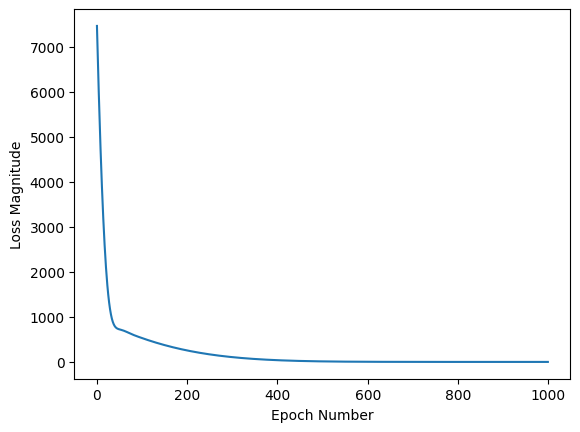

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

`Prediction`

In [10]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 88ms/step
[[211.74059]]


In [11]:
model.get_weights()

[array([[1.7983962]], dtype=float32), array([31.90096], dtype=float32)]

The actual values are, 1.8 and 32. So as we can see tis pretty close.